<div style="border:solid Chocolate 2px; padding: 40px">

### Project Description
This project focuses on the employees of the company "Care with Work". The goal of the project is to assist the company's HR analysts in optimizing workforce management using machine learning methods. We will address two main tasks:

Predicting employee satisfaction levels. This will help the company better understand the factors that influence satisfaction and take timely measures to improve it.
    
Predicting the likelihood of employee turnover. This is critical for preventing sudden resignations, especially among key employees, helping to reduce financial and operational risks for the company.
    
Project Plan
    
1: Predicting Employee Satisfaction Level
    
1. Data Loading
    
Load data from the following files:

Training dataset: train_job_satisfaction_rate.csv

Test feature dataset: test_features.csv

Test target dataset: test_target_job_satisfaction_rate.csv

2. Data Preprocessing

Study and preprocess the data:

Check for missing values and fill them if necessary.

Clean the data from outliers and inconsistencies.

3. Exploratory Data Analysis (EDA)

Conduct exploratory data analysis:

Analyze all features.

Make conclusions about necessary data transformations.

4. Data Preparation

Prepare the data for modeling:

Create a preprocessing pipeline.

Encode categorical features using at least two different encoders.

Scale numerical features.

5. Model Training

Train models and tune hyperparameters:

Train at least two models: one linear (e.g., linear regression) and one based on decision trees.

Perform hyperparameter tuning for at least one model using cross-validation.

Select the best model based on the SMAPE metric.

6. Draw Conclusions

Make intermediate conclusions:

Analyze which model performed best and why.
    
Save the results of all models that were tested.
    
2: Predicting Employee Turnover
For this task, we will use the same input features as in the previous task, but the target feature will be different — the quit (employee turnover) column.

1. Data Loading
Load data from the following files:

Training dataset: train_quit.csv

Test feature dataset: test_features.csv

Test target dataset: test_target_quit.csv

2. Data Preprocessing

Study and preprocess the data:

Check for missing values and fill them in the pipeline if necessary.

Clean the data from outliers and inconsistencies.

3. Exploratory Data Analysis (EDA)

3.1. Conduct exploratory data analysis:

Analyze all features and their relationship with the target feature.
3.2. Create a "turnover employee" profile:

Investigate in which departments and positions employees are more likely to quit.
Compare the average salary of employees who left the company with those who stayed.
3.3. Check the influence of satisfaction level on turnover:

Visualize and compare the distribution of the job_satisfaction_rate feature for employees who left and those who stayed.

4. Add a New Input Feature

Add the predicted satisfaction level:

If job_satisfaction_rate and quit are indeed related and we achieved good metric performance in Task 1, add the predicted job_satisfaction_rate to the input features for Task 2.

5. Data Preparation

Prepare features for modeling:

Create a preprocessing pipeline.

Encode categorical features using at least two encoders.

Scale numerical features.

6. Model Training

Train models and tune hyperparameters:

Train at least three models for turnover prediction.

Tune hyperparameters for at least two of these models.

Evaluate the best model using the ROC-AUC metric.

7. Draw Conclusions

Make intermediate conclusions:

Analyze which model performed best and why.
Save the results of all models that were tested.
Overall Conclusion
Task description: Identifying the factors that influence employee satisfaction and the likelihood of employee turnover.

Work stages: Data collection and preprocessing, exploratory analysis, model training, hyperparameter tuning, model quality evaluation.

Business insights: Identify key factors affecting employee satisfaction and turnover, and provide recommendations for increasing satisfaction and reducing turnover rates.
    

# Task 1: Predicting Employee Satisfaction Level

## Step 1. Data Loading

In [1]:
!pip install scikit-learn==1.1.3 -q

In [2]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install shap -q

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, make_scorer, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.inspection import plot_partial_dependence
from sklearn.cluster import KMeans
import phik
from phik.report import plot_correlation_matrix
from sklearn.tree import DecisionTreeRegressor
from scipy import stats as st
from scipy.stats import uniform
from scipy.stats import ttest_ind
import shap

from IPython.display import FileLink, display

In [5]:
try:
    df_train = pd.read_csv("C:\\Users\\User\\Downloads\\train_job_satisfaction_rate.csv")
    df_test = pd.read_csv("C:\\Users\\User\\Downloads\\test_features.csv")
    df_test_target = pd.read_csv("C:\\Users\\User\\Downloads\\test_target_job_satisfaction_rate.csv")
except FileNotFoundError:
    df_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    df_test = pd.read_csv('/datasets/test_features.csv')
    df_test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [6]:
display(df_train.head())
display(df_test.head())
display(df_test_target.head())
df_train.info()
df_test.info()
df_test_target.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Intermediate Conclusion
    
- All data is well-prepared, and column names are converted to lowercase.
- Data types in all three files are consistent.
- There are a few missing values, which will be handled during preprocessing.
- During preprocessing, we will also check for both explicit and implicit duplicates.

## Step 2. Data Preprocessing

In [7]:
print('Number of missing values in the dataset:', df_train.isna().sum())

Number of missing values in the dataset: id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


In [8]:
object_columns = df_train.select_dtypes(include='object').columns
for col in object_columns:
    unique_values = df_train[col].unique()
    print(f"Unique values in the column: '{col}': {unique_values}")

Unique values in the column: 'dept': ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Unique values in the column: 'level': ['junior' 'middle' 'sinior' nan]
Unique values in the column: 'workload': ['medium' 'high' 'low']
Unique values in the column: 'last_year_promo': ['no' 'yes']
Unique values in the column: 'last_year_violations': ['no' 'yes']


In [9]:
print('The sum of duplicate values in the dataset: df_train:',df_train.duplicated().sum())

The sum of duplicate values in the dataset: df_train: 0


<div style="border:solid Chocolate 2px; padding: 40px">
    
We’ve finished working with the first file, now moving on to the second one.

In [10]:
print('Number of missing values in the dataset:', df_test.isna().sum())

Number of missing values in the dataset: id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


In [11]:
print(df_test.isna().sum())
df_test.info()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [12]:
object_columns = df_test.select_dtypes(include='object').columns
for col in object_columns:
    unique_values = df_test[col].unique()
    print(f"Unique values in the column: '{col}': {unique_values}")

Unique values in the column: 'dept': ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Unique values in the column: 'level': ['junior' 'middle' 'sinior' nan]
Unique values in the column: 'workload': ['medium' 'low' 'high' ' ']
Unique values in the column: 'last_year_promo': ['no' 'yes']
Unique values in the column: 'last_year_violations': ['no' 'yes']


In [13]:
df_test_1 = df_test.query('dept == " "')
display(df_test_1.head())
print('The number of rows in the df_test dataset where the "employee department" column contains missing values:: ', len(df_test_1))
df_test_2 = df_test.query('workload == " "')
display(df_test_2.head())
print('The number of rows in the df_test dataset where the "workload" column contains missing values:: ', len(df_test_2))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


The number of rows in the df_test dataset where the "employee department" column contains missing values::  1


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


The number of rows in the df_test dataset where the "workload" column contains missing values::  1


In [14]:
print('The sum of duplicate values in the df_test dataset:',df_test.duplicated().sum())

The sum of duplicate values in the df_test dataset: 0


<div style="border:solid Chocolate 2px; padding: 40px">
    
Now let's review the third table.

In [15]:
print('Number of missing values in the dataset:', df_test_target.isna().sum())

Number of missing values in the dataset: id                       0
job_satisfaction_rate    0
dtype: int64


In [16]:
print('The sum of duplicate values in the df_test_target dataset:',df_test_target.duplicated().sum())

The sum of duplicate values in the df_test_target dataset: 0


<div style="border:solid Chocolate 2px; padding: 40px">

# Conclusion:
    
We have completed all necessary preprocessing steps:

- Checked for missing values.
- Identified implicit missing values.
- Checked for both explicit and implicit duplicates.
- According to the instructions, missing values should be handled in the pipeline, so we will leave them as is for now.

## Step 3. Exploratory Data Analysis (EDA)

<div style="border:solid Chocolate 2px; padding: 40px">
    
Let’s begin the analysis of the first table.

In [17]:
df_train.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


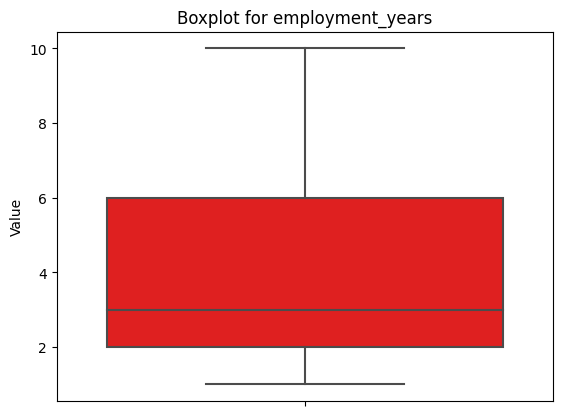

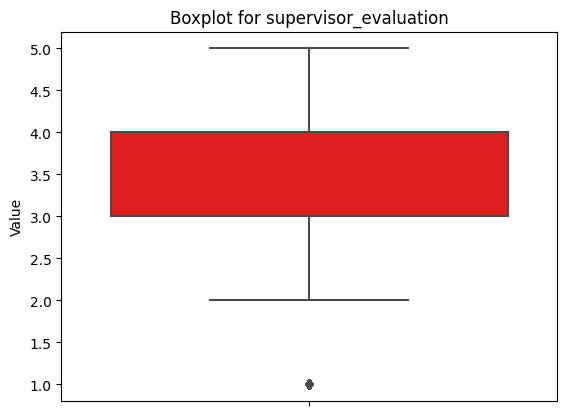

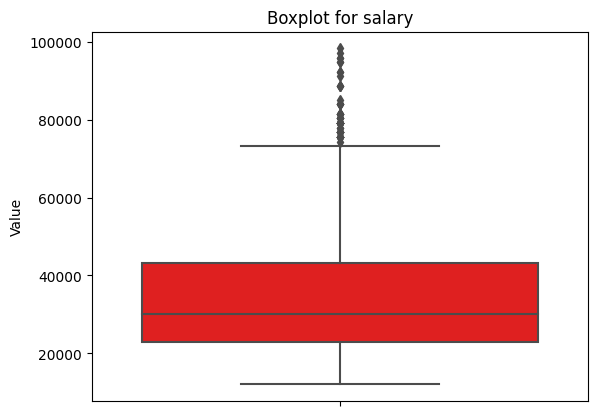

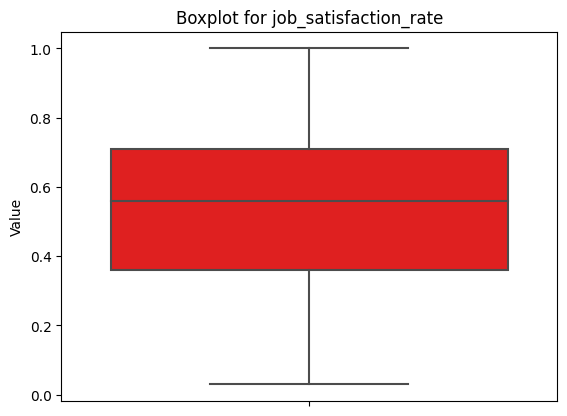

In [18]:
columns_to_exclude = ['id', 'dept', 'workload', 'level', 'last_year_promo', 'last_year_violations']
for column in df_train.columns:
    if column not in columns_to_exclude:
        plt.figure()
        sns.boxplot(y=df_train[column],color='red')
        plt.title(f'Boxplot for {column}')
        plt.ylabel('Value')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">
    
#### Intermediate Conclusion:
    
- There are visible outliers in the salary data. However, there are too many such values, and salaries ranging from 80,000 to 100,000 don't seem unusual.
- There are also outliers in the supervisor evaluation scores. There are 400 employees with a 100% satisfaction rating from their supervisors, but we won't adjust these values either.

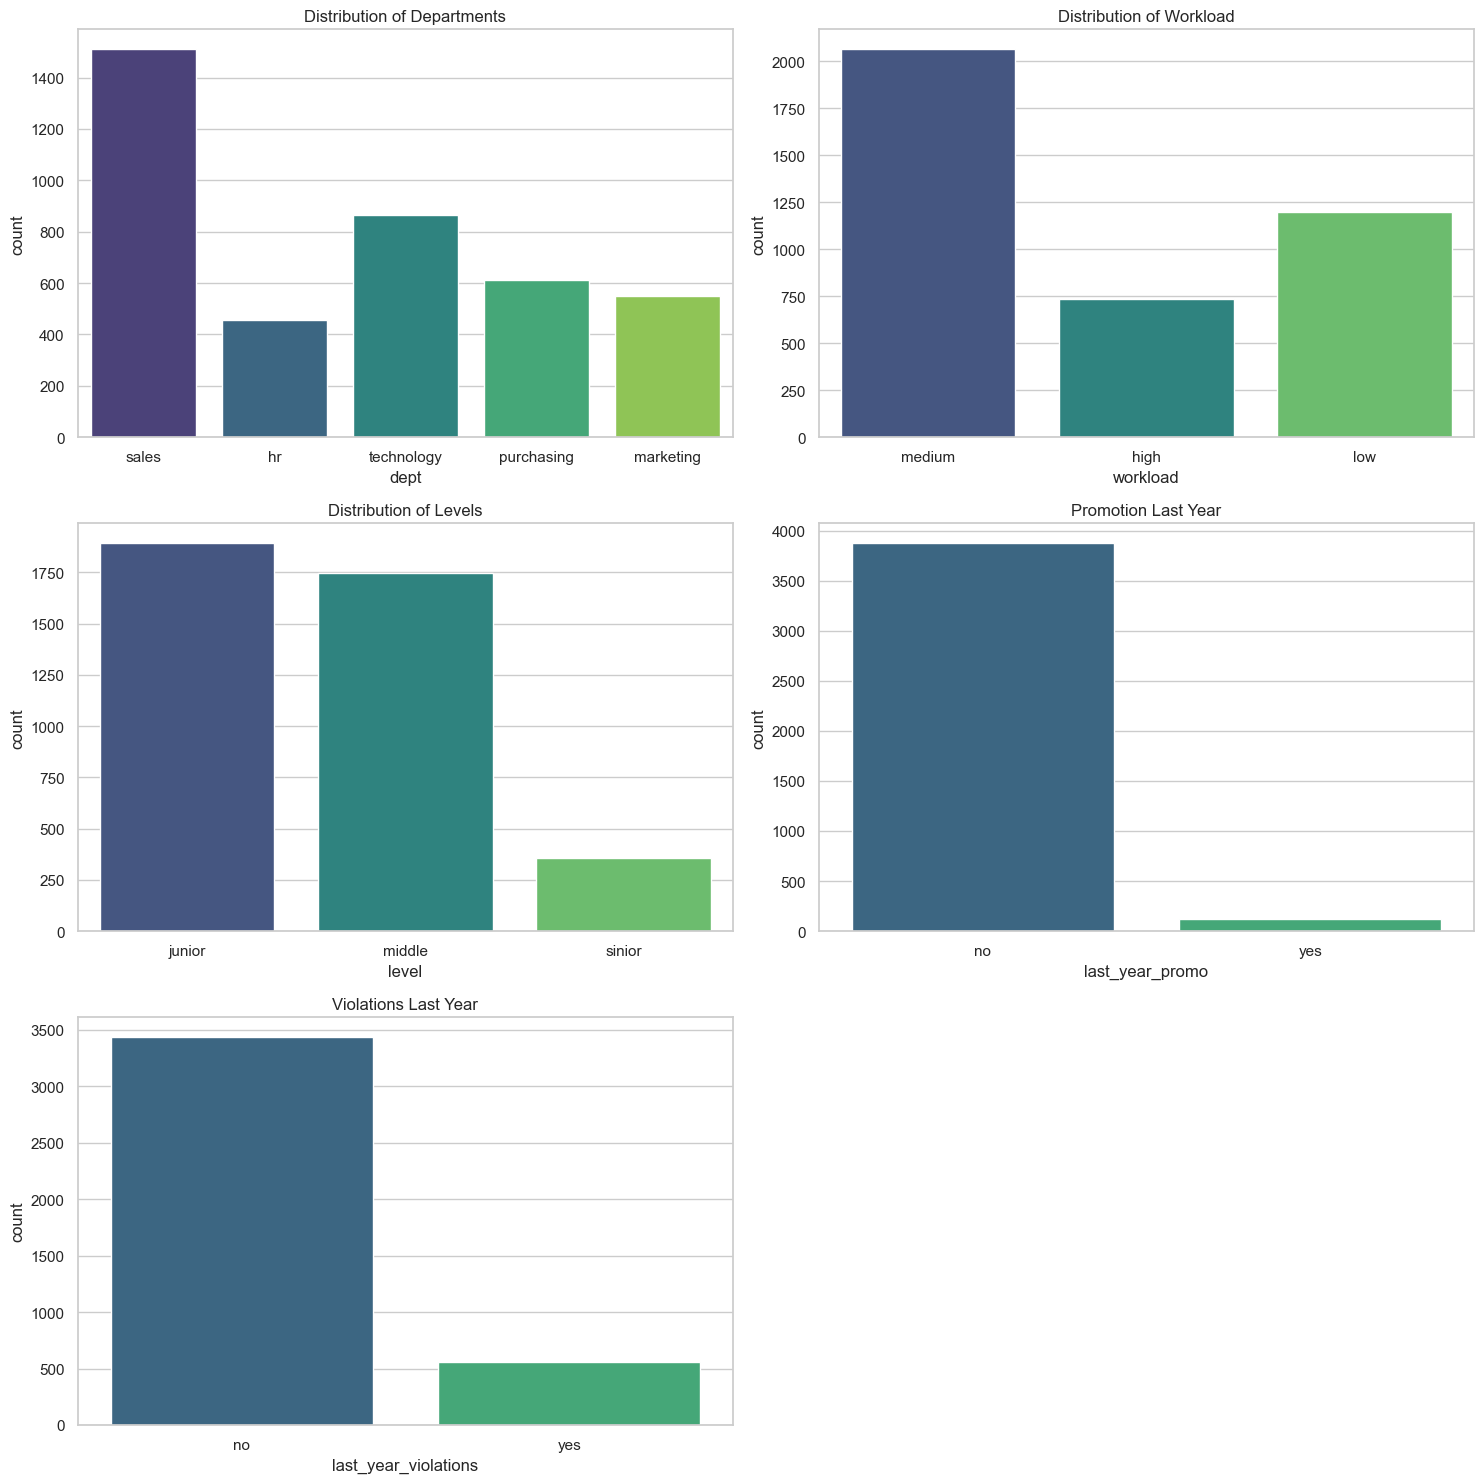

In [19]:
sns.set(style="whitegrid")


fig, axes = plt.subplots(3, 2, figsize=(15, 15))


sns.countplot(ax=axes[0, 0], data=df_train, x='dept', palette='viridis')
axes[0, 0].set_title('Distribution of Departments')


sns.countplot(ax=axes[0, 1], data=df_train, x='workload', palette='viridis')
axes[0, 1].set_title('Distribution of Workload')


sns.countplot(ax=axes[1, 0], data=df_train, x='level', palette='viridis')
axes[1, 0].set_title('Distribution of Levels')


sns.countplot(ax=axes[1, 1], data=df_train, x='last_year_promo', palette='viridis')
axes[1, 1].set_title('Promotion Last Year')


sns.countplot(ax=axes[2, 0], data=df_train, x='last_year_violations', palette='viridis')
axes[2, 0].set_title('Violations Last Year')


fig.delaxes(axes[2, 1])


plt.tight_layout()
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">
    
#### Intermediate Conclusion:
    
- Most employees work in sales, while the fewest are in HR. The technology, procurement, and marketing departments occupy 2nd, 3rd, and 4th places, respectively.
- Most employees have a medium workload, while fewer are heavily loaded. We will classify this column as ordinal.
- The majority of employees are juniors, followed by mid-level, with the fewest being seniors. This will also be considered as ordinal.
- Very few employees have received a promotion.
- There is a small group of employees who have violated their employment contract.

In [20]:
df_test.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


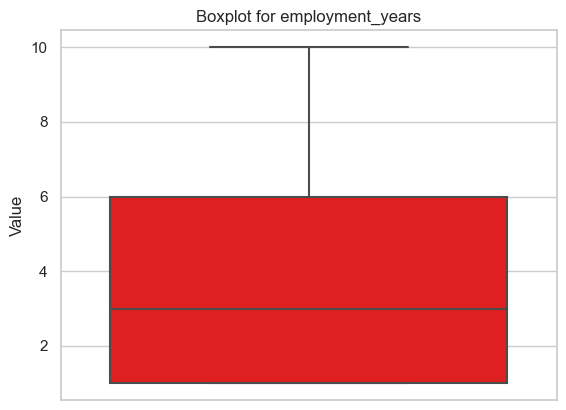

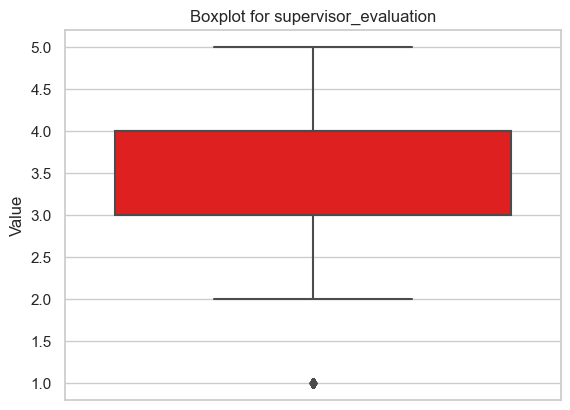

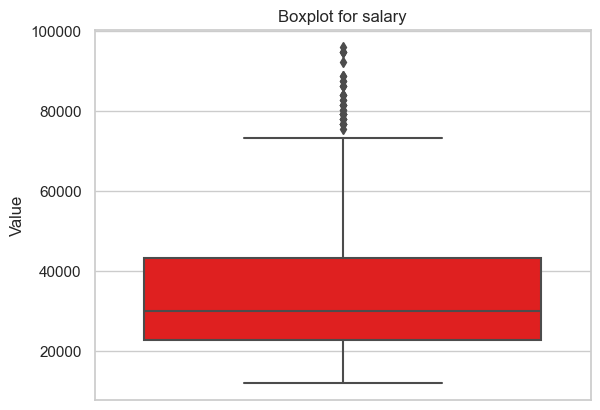

In [21]:
for column in df_test.columns:
    if column not in columns_to_exclude:
        plt.figure()
        sns.boxplot(y=df_test[column],color='red')
        plt.title(f'Boxplot for {column}')
        plt.ylabel('Value')
plt.show()

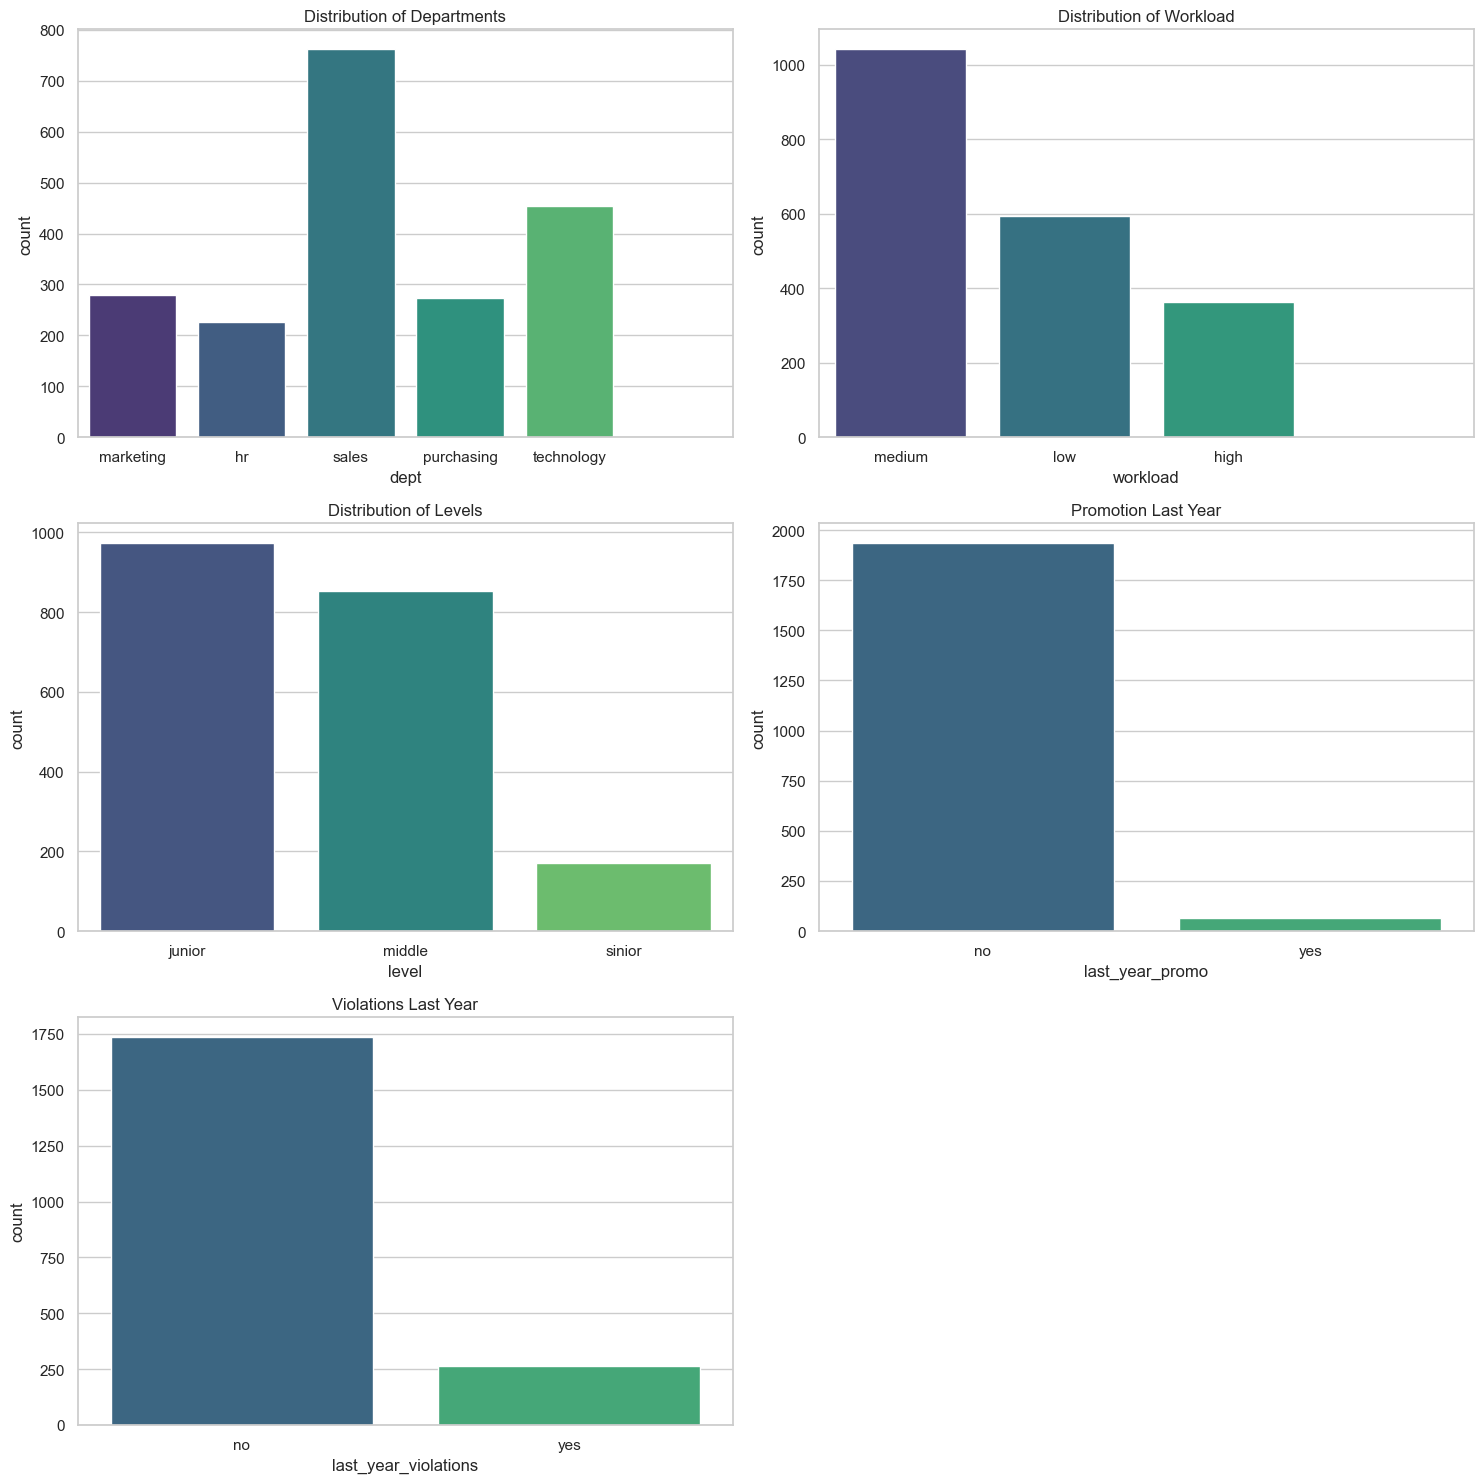

In [22]:
sns.set(style="whitegrid")


fig, axes = plt.subplots(3, 2, figsize=(15, 15))


sns.countplot(ax=axes[0, 0], data=df_test, x='dept', palette='viridis')
axes[0, 0].set_title('Distribution of Departments')


sns.countplot(ax=axes[0, 1], data=df_test, x='workload', palette='viridis')
axes[0, 1].set_title('Distribution of Workload')


sns.countplot(ax=axes[1, 0], data=df_test, x='level', palette='viridis')
axes[1, 0].set_title('Distribution of Levels')


sns.countplot(ax=axes[1, 1], data=df_test, x='last_year_promo', palette='viridis')
axes[1, 1].set_title('Promotion Last Year')


sns.countplot(ax=axes[2, 0], data=df_test, x='last_year_violations', palette='viridis')
axes[2, 0].set_title('Violations Last Year')


fig.delaxes(axes[2, 1])


plt.tight_layout()
plt.show()

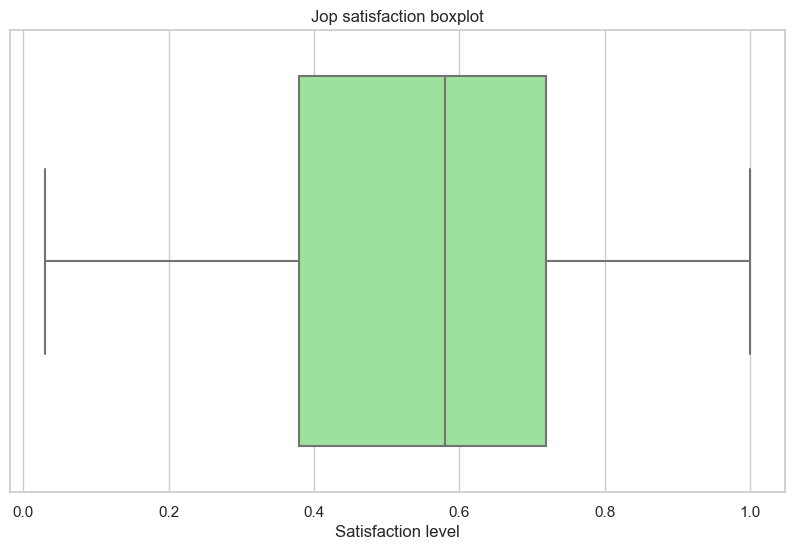

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_target['job_satisfaction_rate'], color='lightgreen')
plt.title('Jop satisfaction boxplot')
plt.xlabel('Satisfaction level')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Exploratory Data Analysis Conclusion
    
Department Distribution:

- The majority of employees work in the sales department.
- The fewest employees are in the HR department.
- The technology, procurement, and marketing departments rank 2nd, 3rd, and 4th, respectively, in terms of employee count.
    
Workload:

- Most employees have a medium workload.
- Fewer employees have a high workload.
- The workload feature can be classified as an ordinal feature.
    
Employee Level:

- The majority of employees are at the junior level.
- Mid-level employees are next.
- The fewest employees are seniors. The level feature will also be treated as ordinal.
 
Last Year’s Promotion:

- Very few employees received a promotion last year.

Employment Violations:

- A small group of employees violated their employment contract last year.
    
Salary:

- There are visible outliers in the salary data, but there are too many such values to consider them anomalies.
- Salaries ranging from 80,000 to 100,000 are not unusual.
    
Supervisor Evaluation:

- There are outliers in supervisor evaluations, with 400 employees receiving a perfect score of 5.
- We will leave this data unchanged, as it may reflect an accurate assessment.
    
Test Dataset Analysis:

- test_features.csv contains the same features as the training set, excluding the target job_satisfaction_rate.
- test_target_job_satisfaction_rate.csv contains only the target feature for the test set.
- The feature distributions in the test dataset are similar to the training set, as confirmed by the analysis of histograms and boxplots.
    
### Conclusion:
    
The exploratory data analysis has shown that most features have logical and expected distributions. The features workload and level should be treated as ordinal.

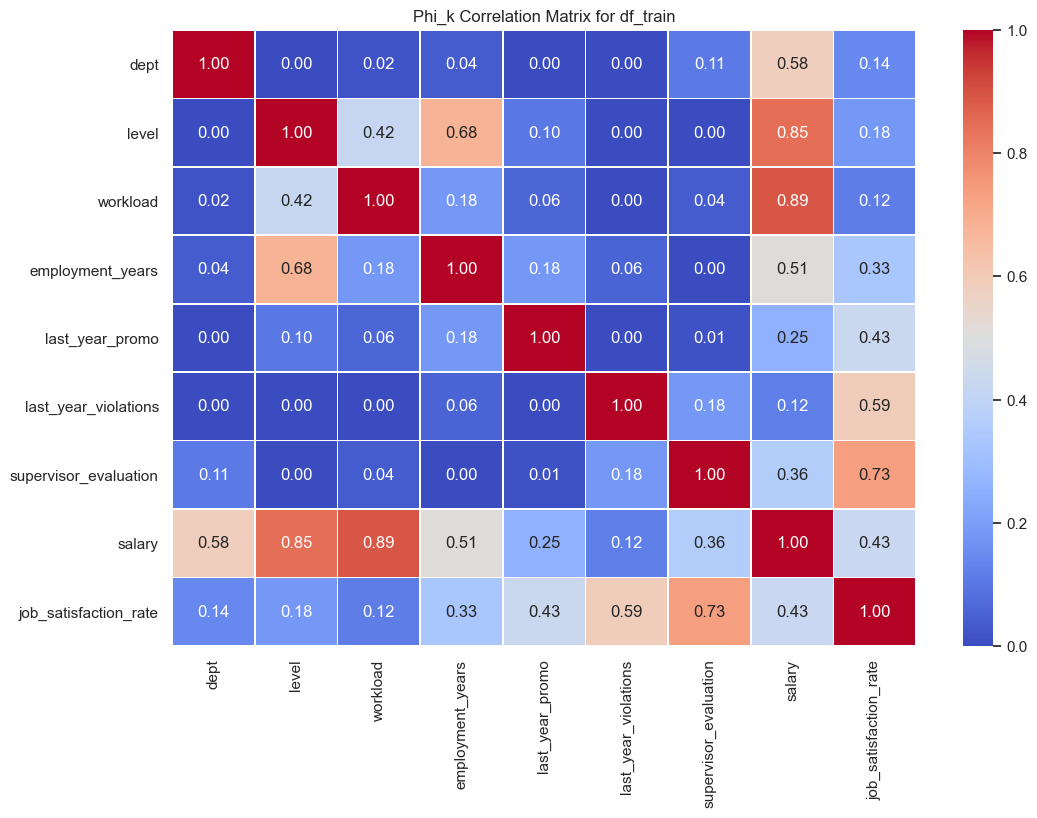

In [24]:
df_train_phik = df_train.drop(columns=['id'])
phik_matrix = df_train_phik.phik_matrix(interval_cols=[])


plt.figure(figsize=(12, 8))


sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)


plt.title('Phi_k Correlation Matrix for df_train')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">
    
Employee workload and salary, as well as workload and job level, are highly correlated with each other, showing strong relationships. However, we definitely won’t remove these features, as logically, high workload clearly influences an employee’s desire to leave, and salary has an even greater impact. Naturally, we also cannot discard job level as a feature.

## Step 4. Data preparation

In [25]:
df_test.replace(' ', np.nan, inplace=True)

In [26]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [27]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='error', sparse=False))
    ]
)
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

    ]
)

num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

In [28]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('oe', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

In [29]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Intermediate Conclusion:
    
We have created a pipeline for data preprocessing and training a linear regression model.
    
- Missing value replacement: Replaced empty spaces with NaN.
- Category definition: Identified columns for One-Hot Encoding, Ordinal Encoding, and numerical columns.
- Processing pipelines: Created separate pipelines for categorical and numerical data using SimpleImputer, OneHotEncoder, OrdinalEncoder, and MinMaxScaler.
- Pipeline integration: Combined these pipelines into a unified data preprocessor.
- Final pipeline: Integrated the preprocessor with the linear regression model. Our process for data preprocessing and model training is now automated and reproducible.

## Step 5. Model Training

In [30]:
df_full = df_test_target.merge(df_test, on='id', how='left')
train_1 = df_train.drop(['id'], axis=1)
train_1.drop_duplicates(inplace=True)

test_1 = df_full.drop(['job_satisfaction_rate','id'], axis=1)

target_1 = df_full['job_satisfaction_rate'] 

X_train = train_1.drop('job_satisfaction_rate', axis=1)
y_train = train_1['job_satisfaction_rate'] 
X_test = test_1
y_test = target_1

In [31]:
param_grid = [

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeRegressor(random_state=42)],
        'models__max_depth': range(1, 15),
        'models__max_features': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [32]:
def calculate_smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
randomized_search = RandomizedSearchCV(
    estimator=Pipeline(steps=[('preprocessor', data_preprocessor), ('models', DecisionTreeRegressor())]),
    param_distributions=param_grid,
    n_iter=10,
    scoring= make_scorer(calculate_smape, greater_is_better=False), 
    cv=5,
    random_state=42
)

In [33]:
randomized_search.fit(X_train, y_train)
print('The best model and its parameters:\n\n', randomized_search.best_estimator_)
print ('The SMAPE of the best model on the training dataset:', round(randomized_search.best_score_, 2))

The best model and its parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('oe',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent'...
                            

In [34]:
y_pred = randomized_search.best_estimator_.predict(X_test)
test_score = calculate_smape(y_test, y_pred)
print('The SMAPE of the best model on the test dataset:', round(test_score, 2))

The SMAPE of the best model on the test dataset: 14.12


<div style="border:solid Chocolate 2px; padding: 40px">
    
### Conclusion:
    
Based on the model training, the following conclusions can be drawn:

Model Selection: The best model, based on SMAPE, was the DecisionTreeRegressor with parameters max_depth=14 and max_features=13.

This indicates that the model is deep enough and considers many features when making predictions.

Data Preprocessing: A ColumnTransformer was used for data preprocessing with multiple stages:

- Categorical features (dept, last_year_promo, last_year_violations) were processed using SimpleImputer(strategy='most_frequent') and OneHotEncoder.
- Ordinal features (level, workload) were also processed using SimpleImputer(strategy='most_frequent') and OrdinalEncoder.
- Numerical features (employment_years, supervisor_evaluation, salary) were scaled using MinMaxScaler.
Performance Metrics:

- On the training dataset, SMAPE reached 15.53, indicating a good fit of the model to the training data.
- On the test dataset, SMAPE reached 14.12, showing that the model performs well in generalizing to unseen data.
- SMAPE for the best model on the test set is approximately 14.12, meaning the model has an average error of 14.12% when predicting job satisfaction levels.
    
Therefore, the model demonstrated good performance on both the training and test sets, confirming its ability to make accurate predictions.

## Step 6: Drawing Conclusions

<div style="border:solid Chocolate 2px; padding: 40px">

#### Based on the training results and performance metrics, the following intermediate conclusions can be made:
    
Best Model: The DecisionTreeRegressor with parameters max_depth=14 and max_features=13 showed the best SMAPE results.

SMAPE: The SMAPE for the best model on the test set was approximately 14.2%, indicating a relatively low average error in the predictions.

Data Preprocessing: The model’s performance was also supported by effective data preprocessing using a ColumnTransformer, which appropriately handled both categorical and numerical features.

Therefore
    
The DecisionTreeRegressor with parameters max_depth=14 and max_features=13 was selected as the best model due to its ability to accurately predict the target variable based on the available data, achieving high accuracy on both the training and test datasets.

# Task 2: Predicting Employee Turnover

### Шаг 1. Загрузка данных

In [35]:
try:
    df_train_quit = pd.read_csv("C:\\Users\\User\\Downloads\\train_quit.csv")
    df_test_target_quit = pd.read_csv("C:\\Users\\User\\Downloads\\test_target_quit.csv")
    df_test_features = pd.read_csv("C:\\Users\\User\\Downloads\\test_features.csv")
except FileNotFoundError:
    df_train_quit = pd.read_csv('/datasets/train_quit.csv')
    df_test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')
    df_test_features = pd.read_csv('/datasets/test_features.csv')

display(df_train_quit.head())
display(df_test_target_quit.head())
display(df_test_features.head())

df_train_quit.info()
df_test_target_quit.info()
df_test_features.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    20

<div style="border:solid Chocolate 2px; padding: 40px">
    
- All data types are consistent.
- No explicit missing values.
- We will check for both explicit and implicit duplicates.
- We will check for empty spaces in cells.

## Step 2. Data Preprocessing

In [36]:
print('The number of duplicates in the df_train_quit table: ',df_train_quit.duplicated().sum())
print('The number of duplicates in the df_test_target_quit: ',df_test_target_quit.duplicated().sum())

The number of duplicates in the df_train_quit table:  0
The number of duplicates in the df_test_target_quit:  0


In [37]:
object_columns = df_train_quit.select_dtypes(include='object').columns
for col in object_columns:
    unique_values = df_train_quit[col].unique()
    print(f"Unique values in the column '{col}': {unique_values}")

Unique values in the column 'dept': ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Unique values in the column 'level': ['middle' 'junior' 'sinior']
Unique values in the column 'workload': ['high' 'medium' 'low']
Unique values in the column 'last_year_promo': ['no' 'yes']
Unique values in the column 'last_year_violations': ['no' 'yes']
Unique values in the column 'quit': ['no' 'yes']


In [38]:
print(f"Unique values in the quit column of the df_test_target_quit dataset:", df_test_target_quit['quit'].unique())

Unique values in the quit column of the df_test_target_quit dataset: ['yes' 'no']


In [39]:
df_train_quit.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [40]:
df_test_target_quit.isna().sum()

id      0
quit    0
dtype: int64

<div style="border:solid Chocolate 2px; padding: 40px">
    
#### Conclusion:

The data is in good condition.

## Step 3. Exploratory Data Analysis (EDA)

<div style="border:solid Chocolate 2px; padding: 40px">
    
- We will conduct an exploratory data analysis.
- We will create a profile of a "resigned employee." For example, we will determine which department has the highest likelihood of employee turnover and assess the workload level of these employees.
- We will also compare the average salary of employees who have left the company with those who have stayed.
- We will test the analysts' assumption regarding the impact of job satisfaction on employee turnover. We will visualize and compare the distribution of the job_satisfaction_rate feature for employees who left and those who remained in the company.

In [41]:
df_train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


In [42]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


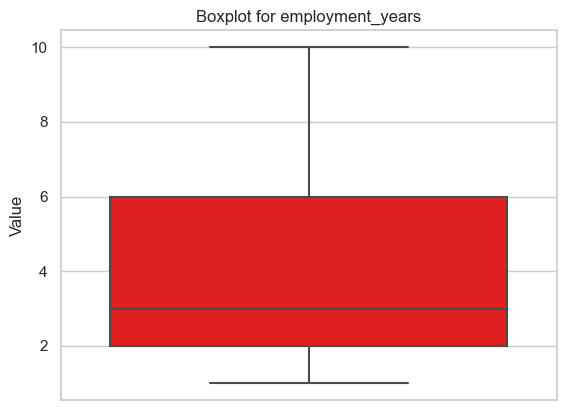

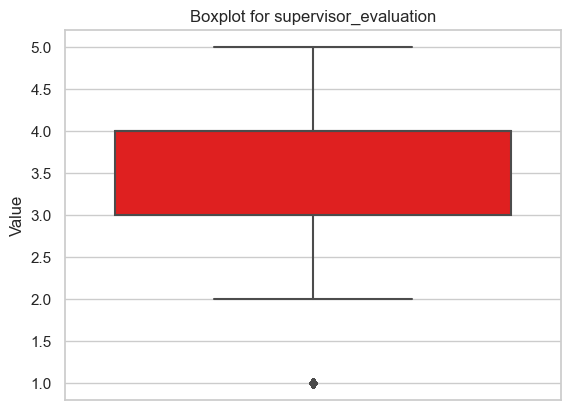

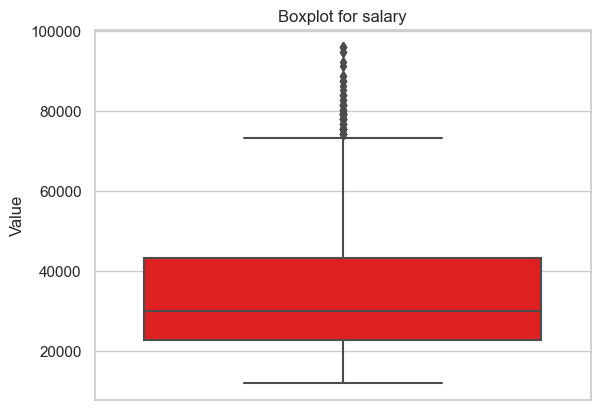

In [43]:
columns_to_exclude = ['id', 'dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
for column in df_train_quit.columns:
    if column not in columns_to_exclude:
        plt.figure()
        sns.boxplot(y=df_train_quit[column],color='red')
        plt.title(f'Boxplot for {column}')
        plt.ylabel('Value')
plt.show()

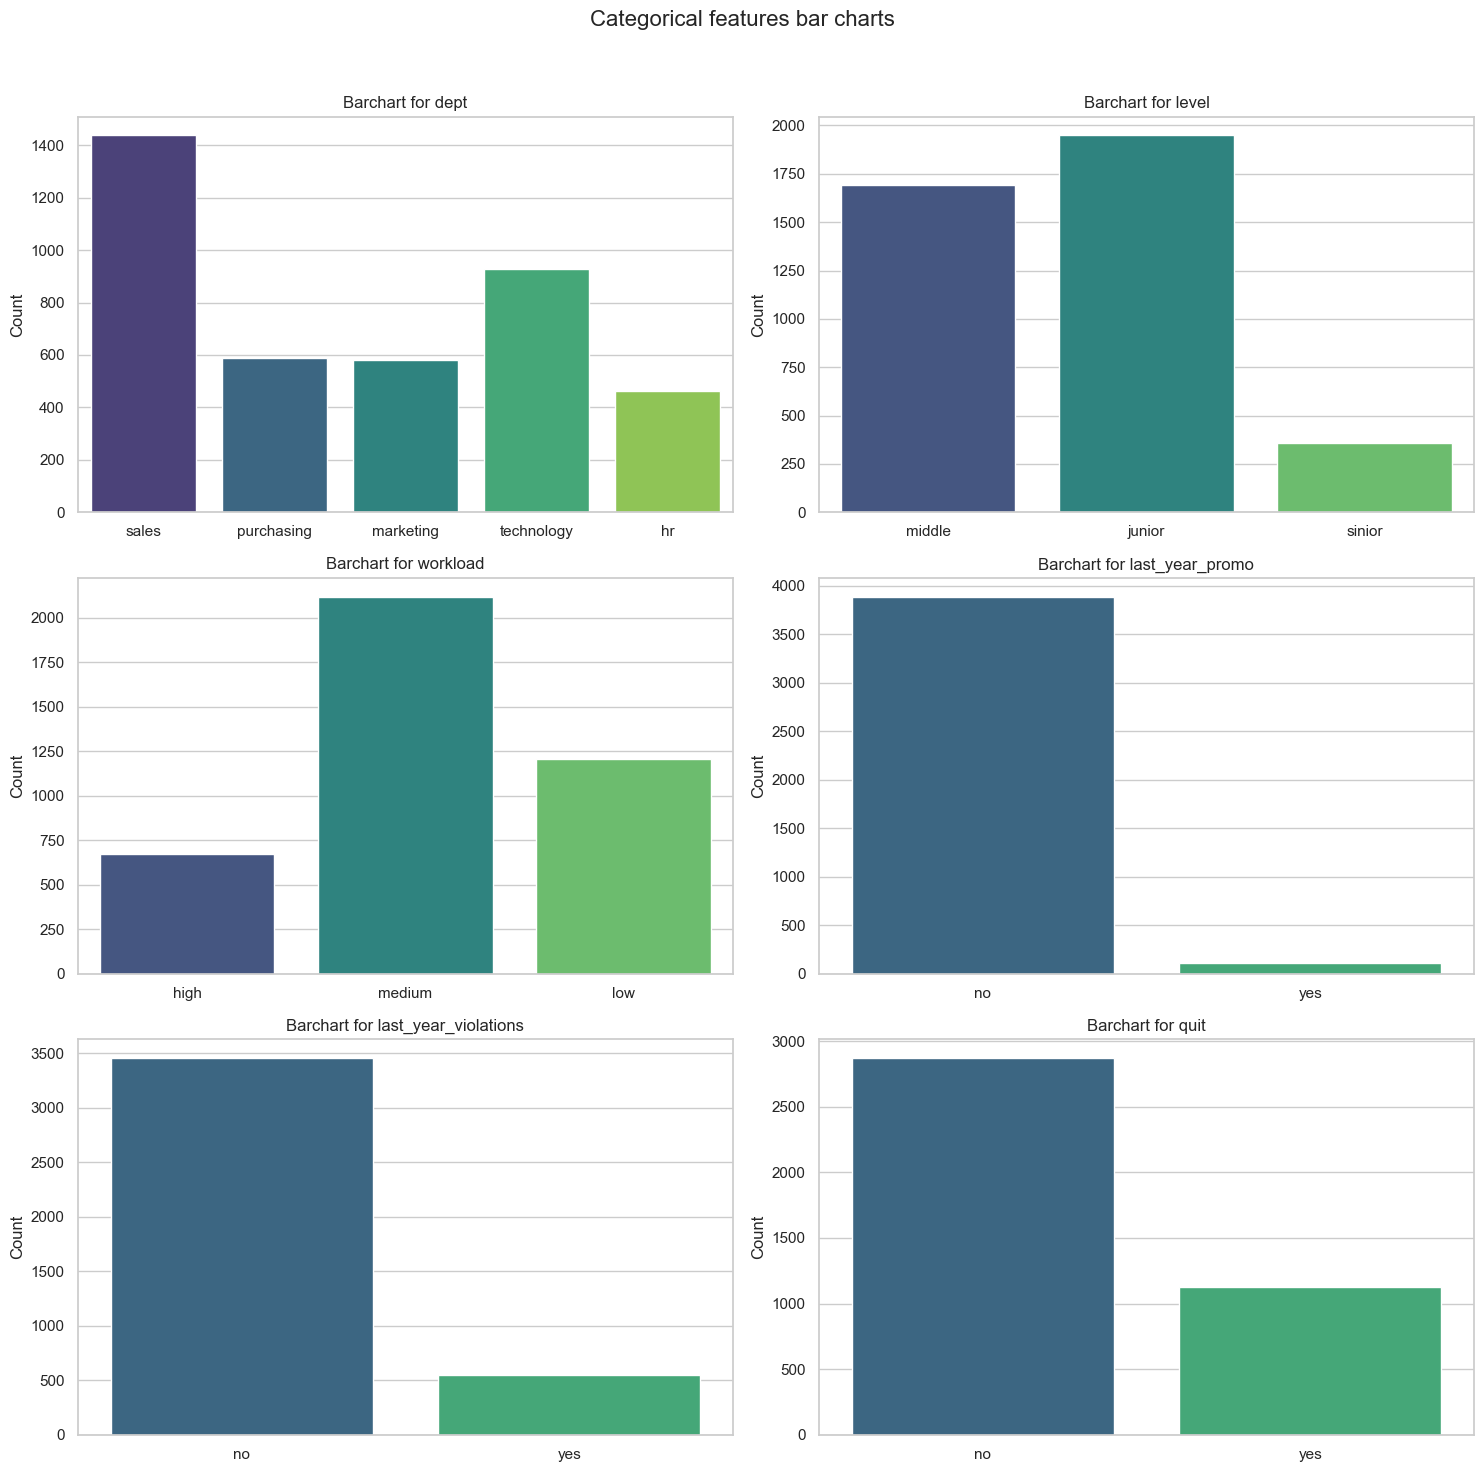

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Categorical features bar charts', fontsize=16)

categorical_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df_train_quit, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Barchart for {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

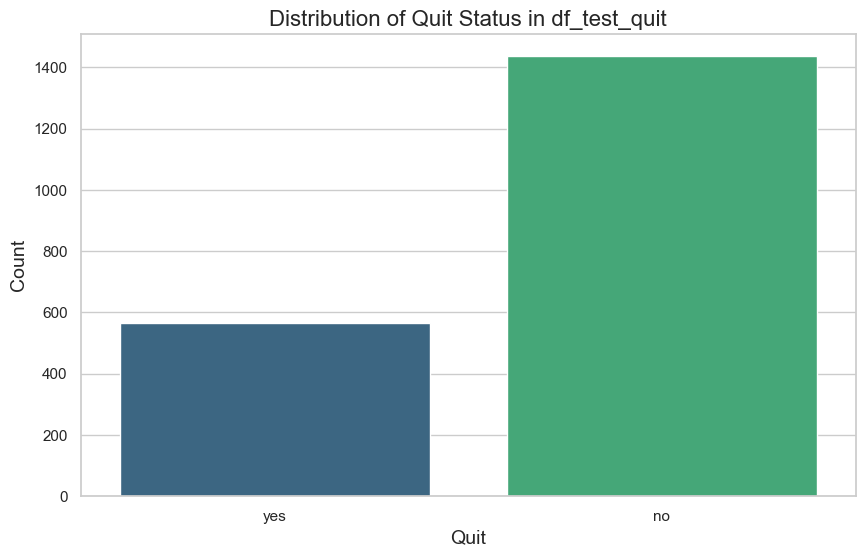

In [45]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.countplot(data=df_test_target_quit, x='quit', palette="viridis")


plt.title('Distribution of Quit Status in df_test_quit', fontsize=16)
plt.xlabel('Quit', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">
    
- The quantitative and categorical features are the same as in the first datasets.
- The number of employees who have left the company is significantly smaller.

<div style="border:solid Chocolate 2px; padding: 40px">

### 3.2

Let's start the analysis:

- Frequency of employee turnover by departments and workload levels.
- Average salary of employees who left compared to those who stayed.
- Analysis of other factors impacting employee turnover.

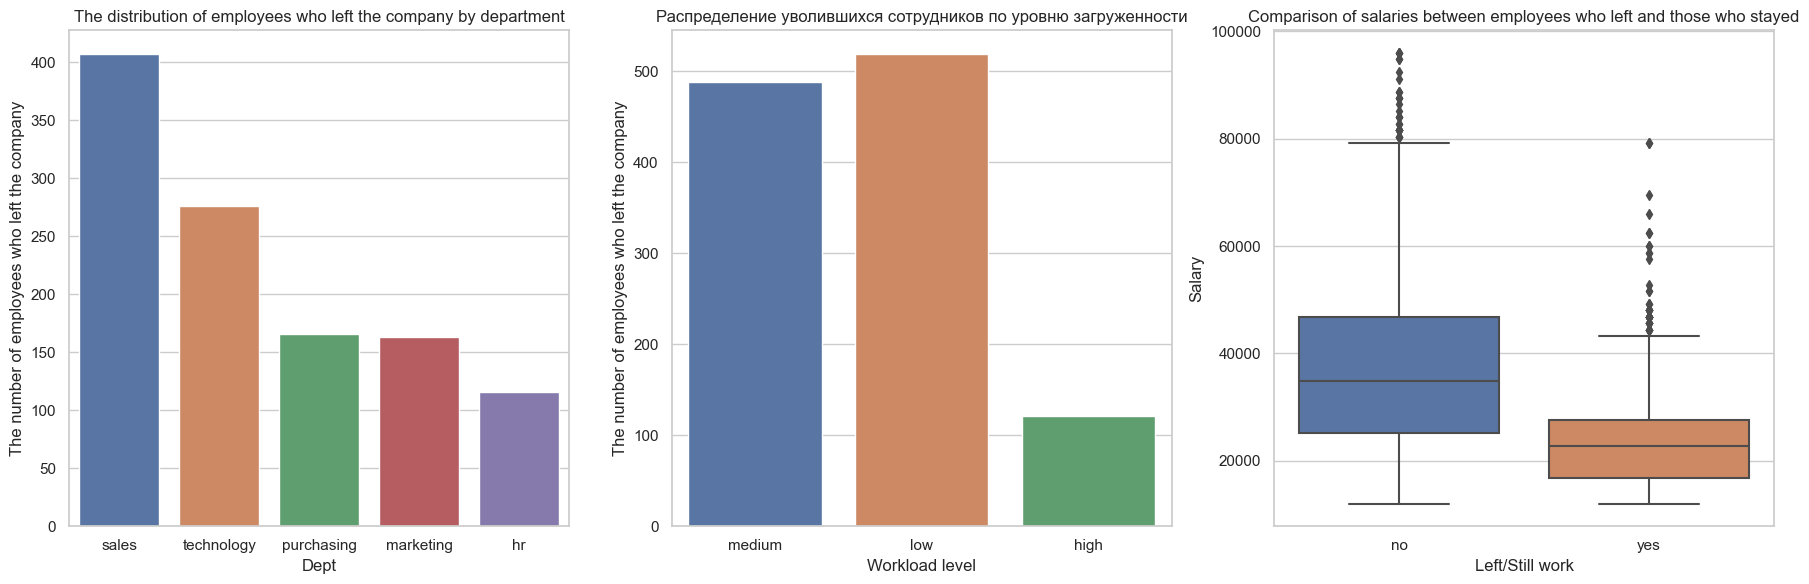

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


sns.countplot(ax=axes[0], data=df_train_quit[df_train_quit['quit'] == 'yes'], x='dept', order=df_train_quit['dept'].value_counts().index)
axes[0].set_title('The distribution of employees who left the company by department')
axes[0].set_xlabel('Dept')
axes[0].set_ylabel('The number of employees who left the company')

sns.countplot(ax=axes[1], data=df_train_quit[df_train_quit['quit'] == 'yes'], x='workload', order=df_train_quit['workload'].value_counts().index)
axes[1].set_title('Распределение уволившихся сотрудников по уровню загруженности')
axes[1].set_xlabel('Workload level')
axes[1].set_ylabel('The number of employees who left the company')

sns.boxplot(ax=axes[2], data=df_train_quit, x='quit', y='salary')
axes[2].set_title('Comparison of salaries between employees who left and those who stayed')
axes[2].set_xlabel('Left/Still work')
axes[2].set_ylabel('Salary')

plt.tight_layout()
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:
    
- By department: Employee turnover is evenly distributed across departments, as the distribution of resignations aligns with the overall department distribution.
- Workload distribution: Employees with the lowest workload tend to leave more frequently compared to others.
- Salary: As expected, salary is a significant factor in employee turnover. Employees with salaries between 18,000 and 23,000 are more likely to leave, indicating that this salary range is considered "low." Employees with higher salaries tend to stay, although there are notable outliers where some employees with higher salaries still leave.

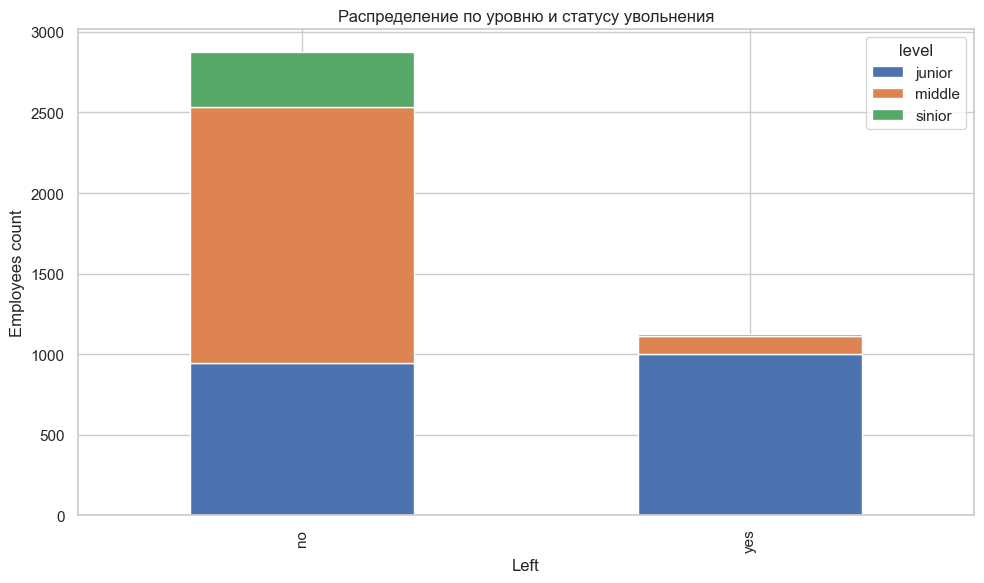

In [47]:
grouped_data = df_train_quit.groupby(['quit', 'level']).size().unstack()

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

grouped_data.plot(kind='bar', stacked=True, ax=axes, title='Распределение по уровню и статусу увольнения')

plt.xlabel('Left')
plt.ylabel('Employees count')
plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\envs\practicum\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'edges  widths
1.0    0.5       0.0
1.5    0.5       0.0
2.0    0.5       0.0
2.5    0.5       0.0
3.0    0.5       0.0
3.5    0.5       0.0
4.0    

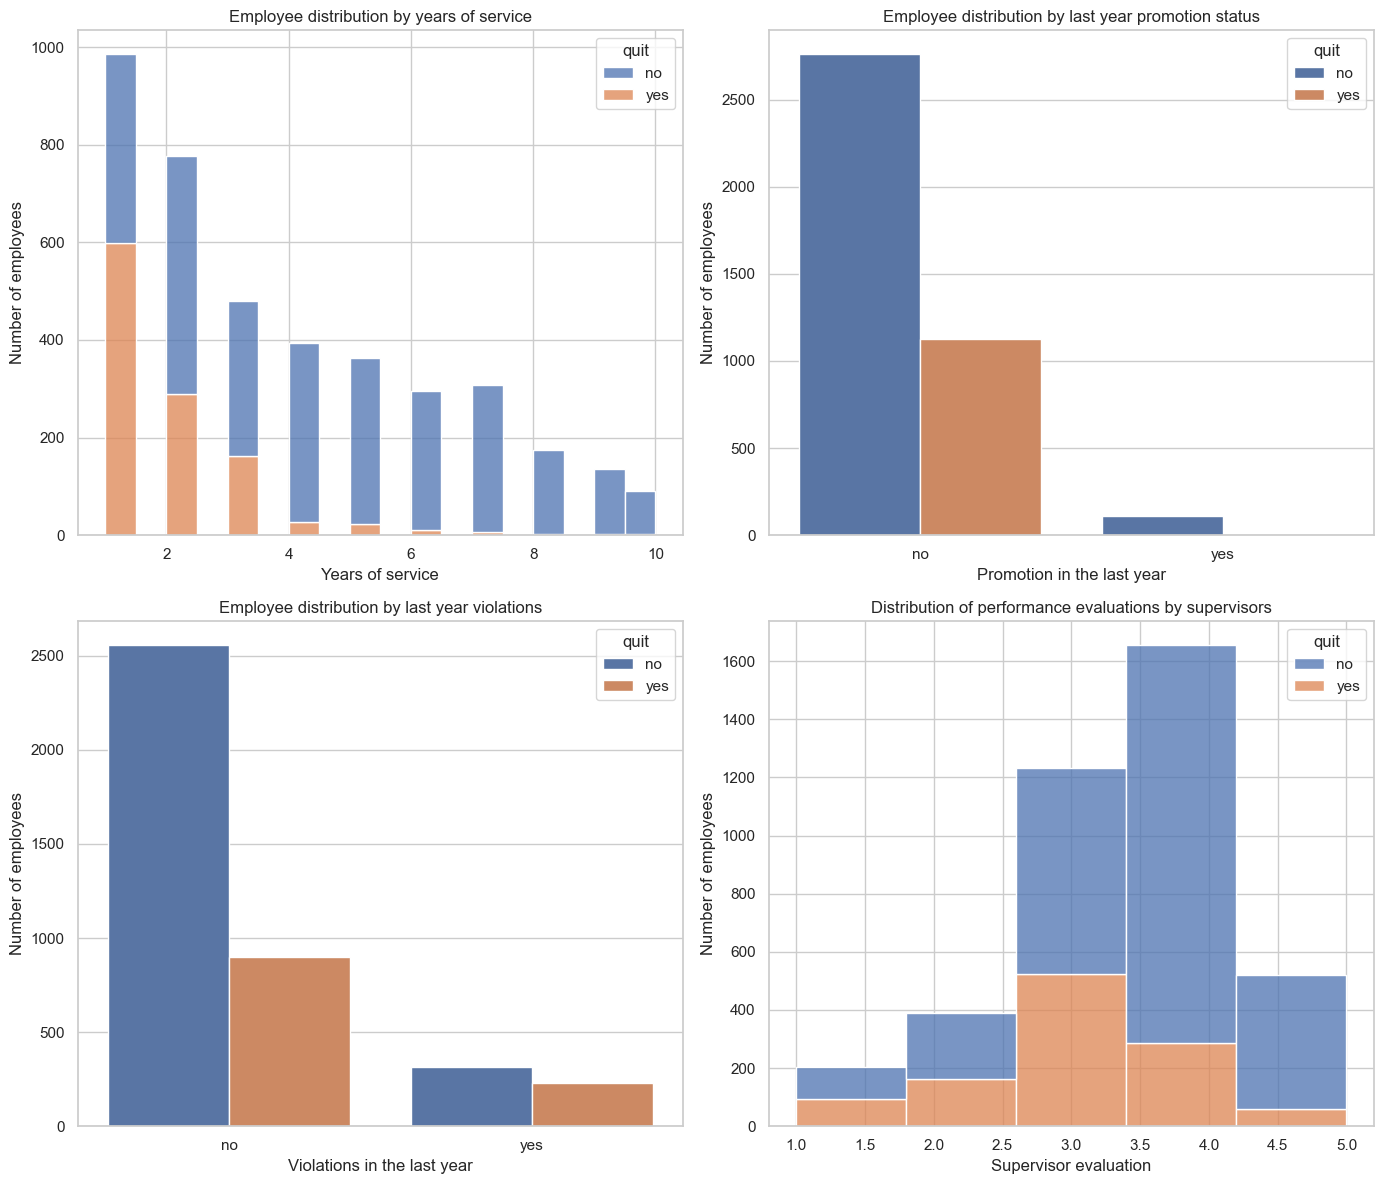

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.histplot(ax=axes[0, 0], data=df_train_quit, x='employment_years', hue='quit', multiple='stack')
axes[0, 0].set_title('Employee distribution by years of service')
axes[0, 0].set_xlabel('Years of service')
axes[0, 0].set_ylabel('Number of employees')

sns.countplot(ax=axes[0, 1], data=df_train_quit, x='last_year_promo', hue='quit')
axes[0, 1].set_title('Employee distribution by last year promotion status')
axes[0, 1].set_xlabel('Promotion in the last year')
axes[0, 1].set_ylabel('Number of employees')

sns.countplot(ax=axes[1, 0], data=df_train_quit, x='last_year_violations', hue='quit')
axes[1, 0].set_title('Employee distribution by last year violations')
axes[1, 0].set_xlabel('Violations in the last year')
axes[1, 0].set_ylabel('Number of employees')

sns.histplot(ax=axes[1, 1], data=df_train_quit, x='supervisor_evaluation', hue='quit', multiple='stack', bins=5)
axes[1, 1].set_title('Distribution of performance evaluations by supervisors')
axes[1, 1].set_xlabel('Supervisor evaluation')
axes[1, 1].set_ylabel('Number of employees')

plt.tight_layout()
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:
- Job level distribution: Mostly, junior-level employees are the ones resigning.
- Employee tenure distribution: The fewer years an employee has worked, the higher the likelihood of resignation. Conversely, employees with 8-10 years of service rarely leave, which is logical as these people are loyal to the company.
- Promotion distribution: At first glance, the distribution of promotions looks similar for both resigned and non-resigned employees. However, those who received a promotion rarely leave the company, which also makes sense.
- Contract violation distribution: Contract violations don't seem to influence whether an employee leaves or not. The distribution of this feature is almost the same for both resigned and non-resigned employees.
- Supervisor evaluation: A supervisor's evaluation of up to 3.5 points doesn't significantly affect whether an employee leaves, with the distribution being around 50/50. However, employees who received higher evaluations (4-5 points) are much less likely to leave.

In [49]:
avg_salary_quit = df_train_quit[df_train_quit['quit'] == 'yes'].groupby('dept')['salary'].mean().reset_index()
avg_salary_not_quit = df_train_quit[df_train_quit['quit'] == 'no'].groupby('dept')['salary'].mean().reset_index()


display(avg_salary_quit)
display(avg_salary_not_quit)

,dept,salary
0,hr,22520.689655
1,marketing,24058.895706
2,purchasing,23378.313253
3,sales,21832.923833
4,technology,27686.956522


,dept,salary
0,hr,37324.137931
1,marketing,39161.813842
2,purchasing,35840.758294
3,sales,35278.370514
4,technology,42003.680982


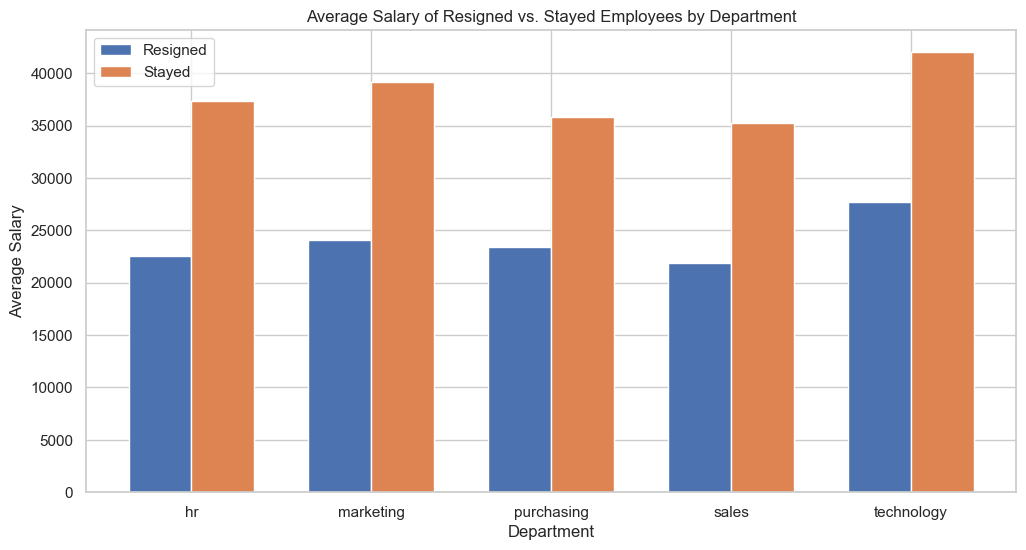

In [50]:
avg_salary_quit.rename(columns={'salary': 'avg_salary_quit'}, inplace=True)
avg_salary_not_quit.rename(columns={'salary': 'avg_salary_not_quit'}, inplace=True)

avg_salary_combined = pd.merge(avg_salary_quit, avg_salary_not_quit, on='dept')

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = range(len(avg_salary_combined))

bar1 = ax.bar(index, avg_salary_combined['avg_salary_quit'], bar_width, label='Resigned')
bar2 = ax.bar([i + bar_width for i in index], avg_salary_combined['avg_salary_not_quit'], bar_width, label='Stayed')

ax.set_xlabel('Department')
ax.set_ylabel('Average Salary')
ax.set_title('Average Salary of Resigned vs. Stayed Employees by Department')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(avg_salary_combined['dept'])
ax.legend()

plt.show()

In [51]:
dept_total = df_train_quit.groupby('dept')['id'].count().reset_index().rename(columns={'id': 'total'})
dept_quit = df_train_quit[df_train_quit['quit'] == 'yes'].groupby('dept')['id'].count().reset_index().rename(columns={'id': 'quit'})


dept_data = pd.merge(dept_total, dept_quit, on='dept', how='left').fillna(0)


dept_data['quit_rate'] = dept_data['quit'] / dept_data['total']

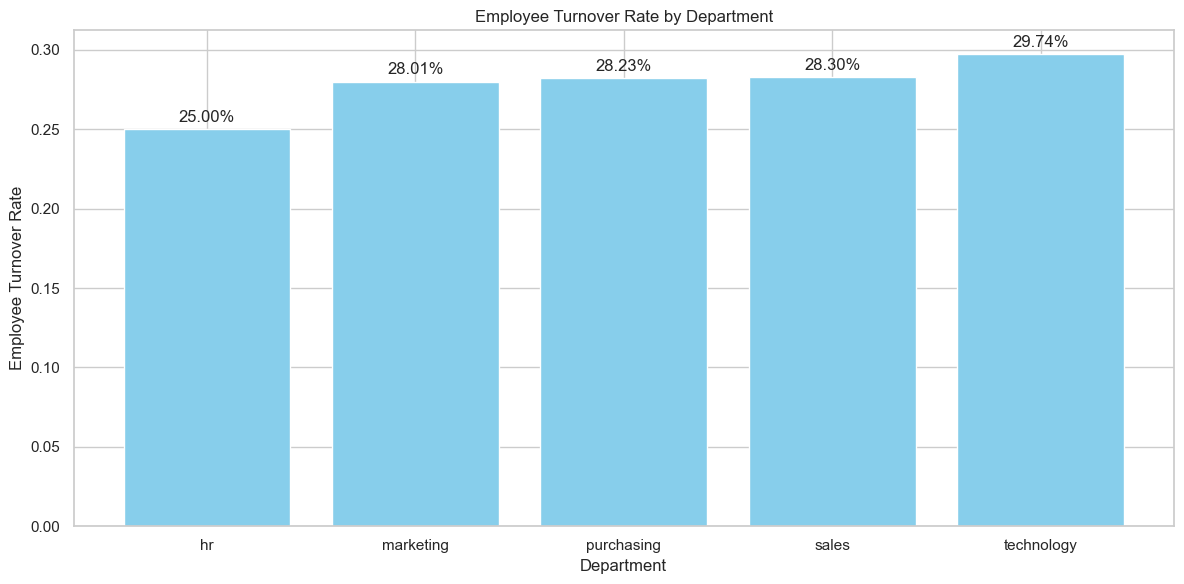

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
bar = ax.bar(dept_data['dept'], dept_data['quit_rate'], color='skyblue')

for rect in bar:
    height = rect.get_height()
    ax.annotate(f'{height:.2%}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel('Department')
ax.set_ylabel('Employee Turnover Rate')
ax.set_title('Employee Turnover Rate by Department')

plt.tight_layout()
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

### Intermediate Conclusion:
    
- The distribution of average salary confirms our previous conclusion: salary has a significant impact on whether an employee stays or leaves, regardless of the department they work in.
- The highest turnover rate is in the technology department (29.74%), followed by sales (28.3%), procurement (28.23%), marketing (28.01%), and HR (25%). Overall, the turnover rate is quite similar across all departments.

In [53]:
display(avg_salary_quit)
display(avg_salary_not_quit)

,dept,avg_salary_quit
0,hr,22520.689655
1,marketing,24058.895706
2,purchasing,23378.313253
3,sales,21832.923833
4,technology,27686.956522


,dept,avg_salary_not_quit
0,hr,37324.137931
1,marketing,39161.813842
2,purchasing,35840.758294
3,sales,35278.370514
4,technology,42003.680982


<div style="border:solid Chocolate 2px; padding: 40px">

### Overall Intermediate Conclusion
    
Quantitative and categorical features: The features in this analysis are similar to those used in the first datasets. The number of employees considering leaving is significantly smaller.

### Key Findings:
    
### By Department:

The distribution of employees across departments shows that turnover is relatively even in all departments. The distribution of resigned employees is similar to the overall department distribution.
By Workload:

Employees with the lowest workload are more likely to leave compared to others.
    
### By Salary:

Salary is a significant factor in employee turnover. Employees earning between 18,000 and 23,000 rubles are more likely to leave. Employees with higher salaries tend to stay, though there are exceptions.
    
### By Tenure:

The distribution of employee tenure shows that the shorter the employment period, the higher the likelihood of resignation. Employees who have worked for 8 or more years rarely leave, indicating loyalty to the company.
    
### By Promotion:

Employees who received a promotion are much less likely to leave. This is logical, as promotions indicate recognition of the employee’s contributions and increase job satisfaction.
    
### By Contract Violations:

Contract violations do not have a significant impact on employee turnover. The distribution of violations is nearly the same for both resigned and retained employees.
    
### By Supervisor Evaluation:

Supervisor evaluations of up to 3.5 points do not influence employee turnover. However, employees with scores of 4-5 points are much less likely to leave.
    
### Average Salary:

The analysis of average salary confirms that salary is an important factor in whether an employee stays or leaves, regardless of the department.
    
### By Job Level:

The analysis shows that junior-level employees are more likely to leave the company.

### 3.3.

<div style="border:solid Chocolate 2px; padding: 40px">
    
Let's visualize and compare the distribution of the job_satisfaction_rate feature for employees who left and those who stayed. We will use the test dataset with both target variables

In [54]:
df_combined = pd.merge(df_test_target, df_test_target_quit, on='id')

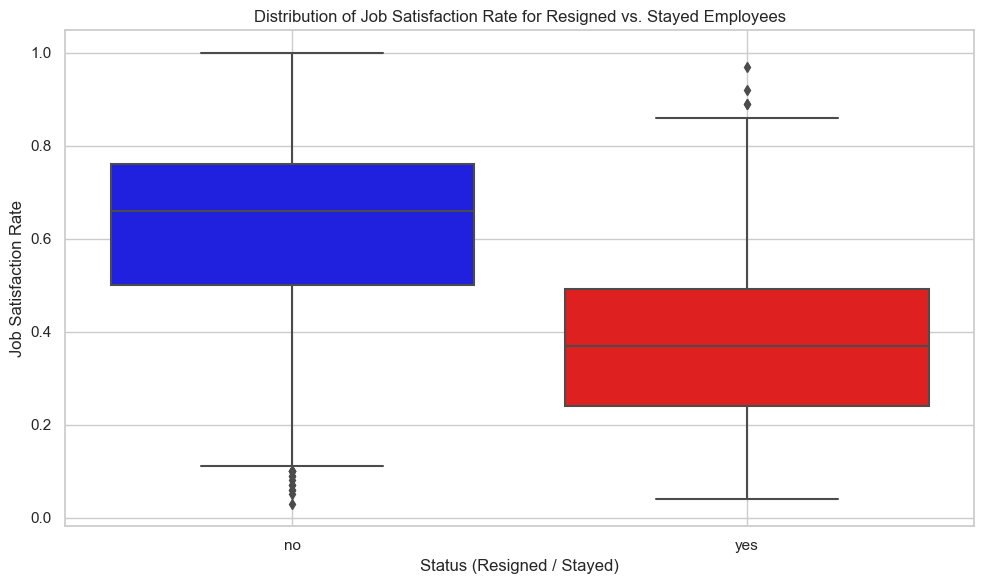

In [55]:
df_quit = df_combined[df_combined['quit'] == 'yes']
df_not_quit = df_combined[df_combined['quit'] == 'no']

plt.figure(figsize=(10, 6))
sns.boxplot(x='quit', y='job_satisfaction_rate', data=df_combined, palette={"no": "blue", "yes": "red"})
plt.title('Distribution of Job Satisfaction Rate for Resigned vs. Stayed Employees')
plt.xlabel('Status (Resigned / Stayed)')
plt.ylabel('Job Satisfaction Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
display(df_combined)

,id,job_satisfaction_rate,quit
0,130604,0.74,no
1,825977,0.75,no
2,418490,0.60,yes
3,555320,0.72,no
4,826430,0.08,yes
...,...,...,...
1995,405257,0.28,no
1996,370925,0.21,yes
1997,857722,0.39,no
1998,303402,0.26,yes


<div style="border:solid Chocolate 2px; padding: 40px">
    
Hypothesis Test:

H0 (Null Hypothesis): Low job satisfaction does not affect employee turnover.
H1 (Alternative Hypothesis): Low job satisfaction affects employee turnover.

In [57]:
low_satisfaction = df_combined[df_combined['job_satisfaction_rate'] < 0.5].copy()
high_satisfaction = df_combined[df_combined['job_satisfaction_rate'] >= 0.5].copy()

low_satisfaction.loc[:, 'quit'] = low_satisfaction['quit'].map({'yes': 1, 'no': 0})
high_satisfaction.loc[:, 'quit'] = high_satisfaction['quit'].map({'yes': 1, 'no': 0})

t_statistic, p_value = ttest_ind(low_satisfaction['quit'], high_satisfaction['quit'])

if p_value < 0.05:
    print("Low job satisfaction affects employee turnover.")
else:
    print("Low job satisfaction does not affect employee turnover.")
print('p-value:', p_value)

Low job satisfaction affects employee turnover.
p-value: 3.286783595459786e-106


<div style="border:solid Chocolate 2px; padding: 40px">
    
Based on the conducted t-test, we can conclude that low job satisfaction affects employee turnover. With a significance level of 0.05, the p-value is lower than the chosen significance level, allowing us to reject the null hypothesis and accept the alternative hypothesis. Therefore, we have statistically significant evidence that low job satisfaction influences employees' decision to leave the company.

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Intermediate Conclusion:
    
- The histogram and boxplots show that job satisfaction indeed affects whether employees leave or stay.
- Employees who stay have satisfaction levels generally between 0.5 and 0.78.
- Employees who leave have satisfaction levels typically between 0.25 and 0.5.
- Of course, there are employees who stay despite having low satisfaction levels (even as low as 0), and there are those who leave with satisfaction as high as 0.9.
- Low job satisfaction significantly influences employees' decisions to leave the company.

## Step 4: Adding a New Input Feature

<div style="border:solid Chocolate 2px; padding: 40px">

Let's add the job_satisfaction_rate, predicted by the best model from the first task, to the input features of the second task.

In [58]:
best_model = randomized_search.best_estimator_

In [59]:
df_train_quit['job_satisfaction_rate'] = best_model.predict(df_train_quit)
display(df_train_quit.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.657407
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.840588
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.457500
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.380000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


## Step 5: Data Preparation

In [60]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [61]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [62]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('oe', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

In [63]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier())
])

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Intermediate Conclusion:

- We have updated the pipeline for data preprocessing and training the decision tree model. Here's what we've done:
- Missing Value Replacement: Replaced spaces with NaN.
- Category Identification: Identified columns for One-Hot Encoding, Ordinal Encoding, and numerical columns.
    
### Processing Pipelines:
- For One-Hot Encoding: Created a pipeline with SimpleImputer and OneHotEncoder.
- For Ordinal Encoding: Created a pipeline with SimpleImputer and OrdinalEncoder.
- For Numerical Data: Used the previously created pipeline with SimpleImputer and MinMaxScaler.
    
### Pipeline Combination:
    
- Combined them into a unified data preprocessor using ColumnTransformer.
    
### Final Pipeline:
    
- Combined the preprocessor with the DecisionTreeClassifier model.
    
Now, our data preprocessing and model training process is automated and ready for use.

## Step 6. Model training

In [64]:
df_test['job_satisfaction_rate'] = best_model.predict(df_test)

In [65]:
df_full_2 = df_test_target_quit.merge(df_test, on='id', how='left')

In [66]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [67]:
train_2 = df_train_quit.drop(['id'], axis=1)
train_2.drop_duplicates(inplace=True)

test_2 = df_full_2.drop(['quit','id'], axis=1)

target_2 = df_full_2['quit'] 

In [68]:
X_train = train_2.drop('quit', axis=1)
y_train = train_2['quit'] 
X_test = test_2
y_test = target_2

In [69]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 15),
        'models__max_features': range(1, 15),
        'preprocessor': [data_preprocessor]
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 15),
        'preprocessor': [data_preprocessor]
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 15),
        'preprocessor': [data_preprocessor]
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(1, 15),
        'preprocessor': [data_preprocessor]
    }
]

In [70]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [71]:
grid_search  = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

In [72]:
grid_search.fit(X_train, y_train_encoded)
best_model = grid_search.best_estimator_
print('Best model and its parameters:\n\n', grid_search.best_estimator_)
print(f'ROC-AUC metric of the best model on cross-validation using training data: {round(grid_search.best_score_, 4)}')

Best model and its parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('oe',
                                   

In [73]:
print(f'ROC-AUC metric of the best model on the test set: {round(roc_auc_score(y_test_encoded, grid_search.predict_proba(X_test)[:, 1]), 4)}')

ROC-AUC metric of the best model on the test set: 0.9117


<div style="border:solid Chocolate 2px; padding: 40px">

# Step 7: Conclusions

#### Model Description

The best model, based on cross-validation and the test set, consists of the following steps:

1. **Feature Transformation** using `ColumnTransformer`, which includes three sub-pipelines for processing categorical and numerical features:
    - **One-Hot Encoding** for categorical features `dept`, `last_year_promo`, `last_year_violations`.
    - **Ordinal Encoding** for categorical features `level` and `workload`.
    - **Simple Imputer and MinMax Scaler** for numerical features `employment_years`, `supervisor_evaluation`, `salary`, `job_satisfaction_rate`.
2. **Classification** using `DecisionTreeClassifier` with parameters `max_depth=4`, `max_features=11`, `random_state=42`.

#### Model Metrics

- **ROC-AUC on cross-validation using training data:** 0.9042
- **ROC-AUC on the test set:** 0.9117

#### Intermediate Conclusions

1. **High Model Performance:**
   - The model achieved high ROC-AUC values on both cross-validation and the test set, indicating its strong ability to distinguish between classes (employees who quit vs. those who stayed).

2. **Data Processing:**
   - The combination of One-Hot Encoding and Ordinal Encoding for categorical features allowed the model to handle different types of categorical data effectively.
   - Applying Simple Imputer for missing value imputation and MinMax Scaler for numerical data normalization improved the model’s predictive quality by ensuring proper handling of data with varying scales.

3. **Decision Tree Parameters:**
   - Limiting the depth of the tree (`max_depth=5`) and the number of features (`max_features=8`) helped prevent overfitting and improved the model’s generalization ability.
   - The chosen parameters were optimal for this dataset, as evidenced by the high ROC-AUC values.

#### Reasons for High Performance

1. **Balance Between Complexity and Generalization:**
   - The model, with its limited tree depth and restricted number of features, found an optimal balance between complexity and generalization. This allowed it to perform well on new data, as confirmed by high ROC-AUC values on the test set.

2. **Effective Handling of Categorical and Numerical Features:**
   - Proper use of encoding methods for categorical data and scaling of numerical data ensured an adequate representation of the features for the model, enhancing its predictive capabilities.

3. **Advantages of Using DecisionTreeClassifier:**
   - Decision trees perform well on classification tasks, especially when data exhibits non-linear dependencies and interactions between features. They also offer interpretability, making it easier to understand which features play a key role in the predictions.

### Conclusion

This model outperformed others due to a combination of efficient data processing and optimal decision tree parameters, resulting in high ROC-AUC values on both cross-validation and the test set.

</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
Let's check the feature importance using the SHAP method.

In [74]:
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.TreeExplainer(best_model.named_steps['models'], X_train_2)

In [75]:
X_test_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_test)

In [76]:
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

In [77]:
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

In [78]:
shap_values = explainer(X_test_2)

In [79]:
shap_values_class_1 = shap_values[..., 1]

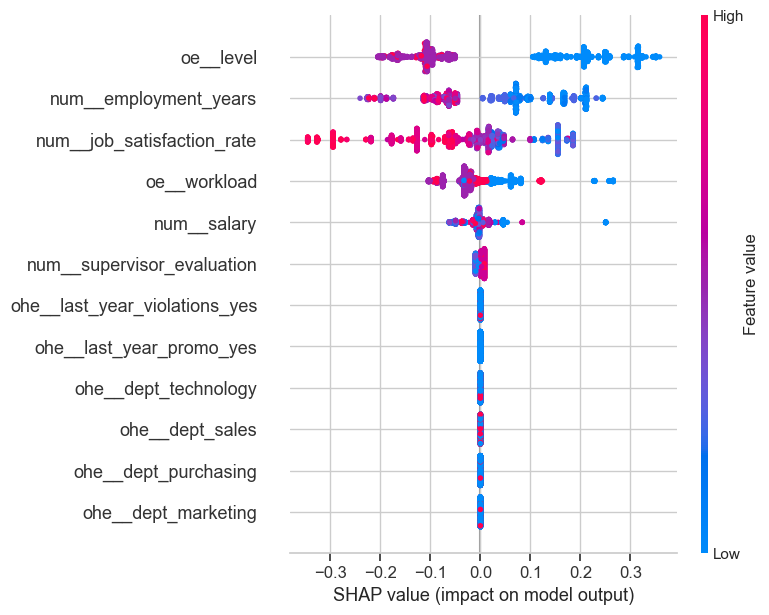

In [80]:
shap.summary_plot(shap_values_class_1, X_test_2, plot_type='dot', max_display=30, show=False)
plt.xticks(fontsize=12)
plt.show()

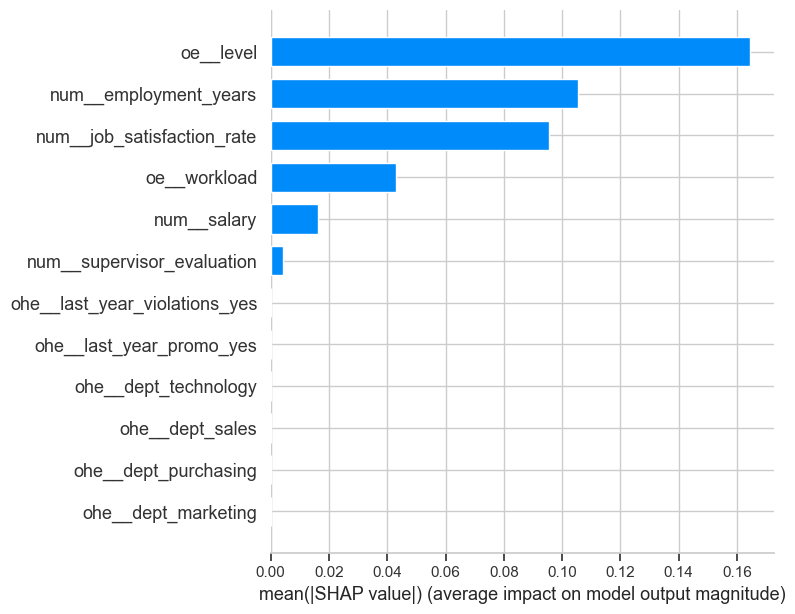

In [81]:
shap.summary_plot(shap_values_class_1, X_test_2, plot_type="bar", max_display=30)

<div style="border:solid Chocolate 2px; padding: 40px">
    
## Based on the provided SHAP summary plot graphs, the following conclusions can be drawn:

**Feature Importance:**

**Level:**

This is the most important feature. Both exploratory analysis and feature importance analysis show that the employee's level (junior, senior, middle) plays a significant role in the likelihood of resignation. For instance, junior employees have a very high probability of leaving.

**Number of Employment Years:**

This strongly influences the model's predictions. As seen in the exploratory analysis, those who have worked longer, such as 8 or 10 years, are less likely to leave, whereas the probability of leaving increases with fewer years of employment.

**Job Satisfaction Rate:**

A high level of job satisfaction decreases the probability of resignation, whereas a low level increases it.

**Salary:**

Salary is also a significant feature. High salary values reduce the likelihood of leaving, while low salary values increase it.

**Supervisor Evaluation:**

A high supervisor evaluation decreases the likelihood of leaving, while a low evaluation increases it.

**ohe__dept_technology, ohe__last_year_promo_yes, ohe__last_year_violations_yes, ohe__dept_purchasing, ohe__dept_marketing:**

These features have less influence on the model but still contribute to the predictions.

**Conclusion:**

SHAP analysis revealed that factors such as employment years, employee level, job satisfaction, salary, and supervisor evaluation are key features influencing the likelihood of employee resignation. It is important to consider these factors when developing retention strategies, such as improving job satisfaction and working conditions for employees.
</div>

In [82]:
X_test_new = df_test.drop(['id'], axis=1)
predictions_new = best_model.predict(X_test_new)

In [83]:
df_test['quit'] = predictions_new

In [84]:
df_test_target_quit['quit'] = df_test_target_quit['quit'].apply(lambda x: 1 if x =='yes' else 0)

In [85]:
predicted_ids = df_test[df_test['quit'] == 1]['id']
actual_quit_ids = df_test_target_quit[df_test_target_quit['quit'] == 1]['id']


false_positive_ids = predicted_ids[~predicted_ids.isin(actual_quit_ids)]


false_positives = df_test[df_test['id'].isin(false_positive_ids)]


display(false_positives)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
16,849959,technology,middle,low,2,no,no,4,27600,0.430000,1
124,206540,sales,junior,high,2,no,no,3,33600,0.710000,1
143,343666,sales,junior,medium,3,no,no,3,26400,0.533333,1
183,222742,sales,junior,medium,1,no,no,4,21600,0.500909,1
189,788782,sales,junior,medium,2,no,no,2,24000,0.470000,1
...,...,...,...,...,...,...,...,...,...,...,...
1896,551545,purchasing,junior,medium,3,no,no,3,25200,0.503333,1
1938,980194,hr,junior,medium,1,no,no,4,22800,0.535000,1
1945,642991,sales,junior,medium,1,no,no,4,21600,0.500909,1
1948,535597,purchasing,junior,low,1,no,no,4,12000,0.510000,1


<Figure size 1000x700 with 0 Axes>

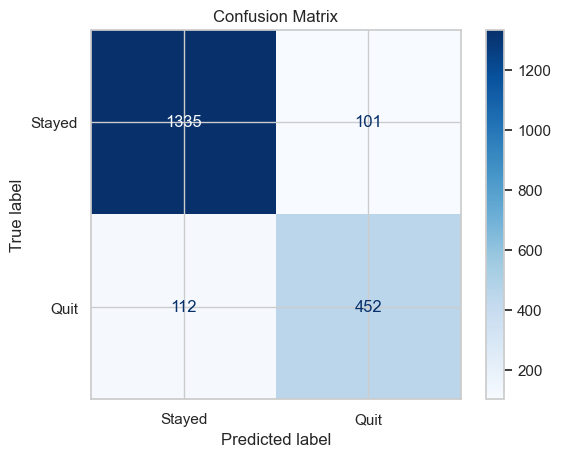

In [86]:
merged_df = df_test.merge(df_test_target_quit, on='id', suffixes=('_predicted', '_actual'))


y_true = merged_df['quit_actual']
y_pred = merged_df['quit_predicted']


cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=["Stayed", "Quit"])


plt.figure(figsize=(10, 7))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">
    
The confusion matrix confirms that 115 people who were predicted by the model to leave actually did not. Let's analyze this further.
</div>

In [87]:
df_full_2['quit'] = df_full_2['quit'].apply(lambda x: 1 if x == 'yes' else 0)

In [88]:
df_quit_no = df_full_2.query('quit==0')

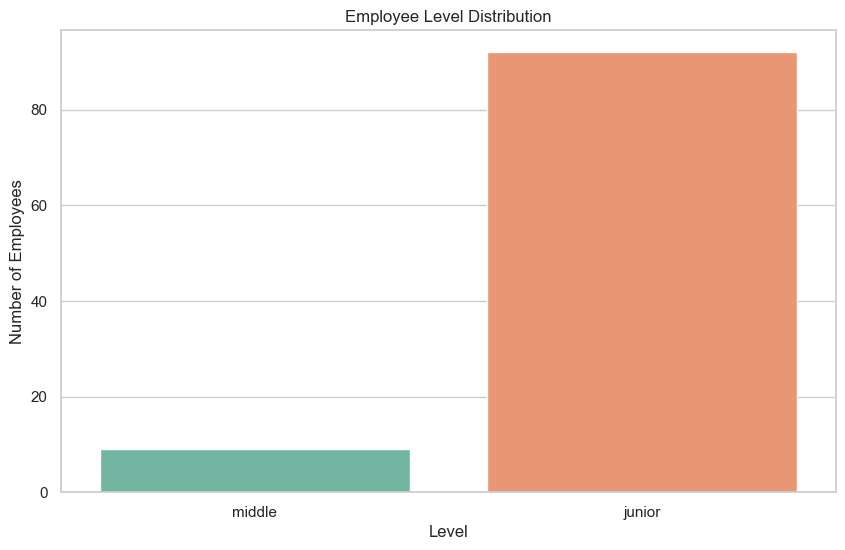

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(data=false_positives, x='level', palette='Set2')
plt.title('Employee Level Distribution')
plt.xlabel('Level')
plt.ylabel('Number of Employees')
plt.show()

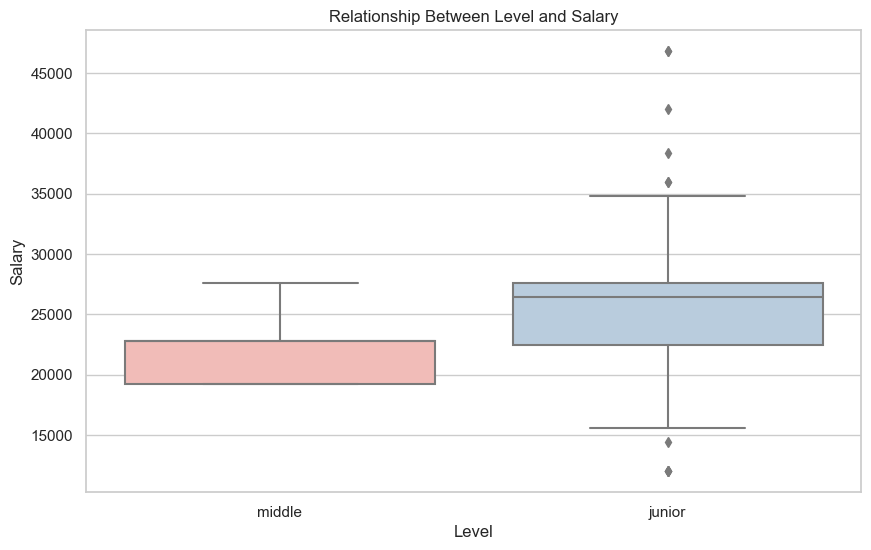

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=false_positives, x='level', y='salary', palette='Pastel1')
plt.title('Relationship Between Level and Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

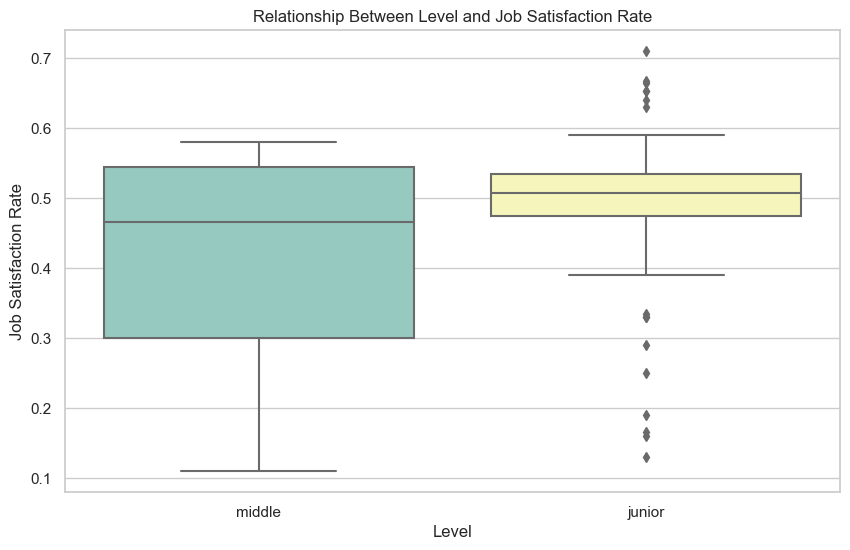

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=false_positives, x='level', y='job_satisfaction_rate', palette='Set3')
plt.title('Relationship Between Level and Job Satisfaction Rate')
plt.xlabel('Level')
plt.ylabel('Job Satisfaction Rate')
plt.show()

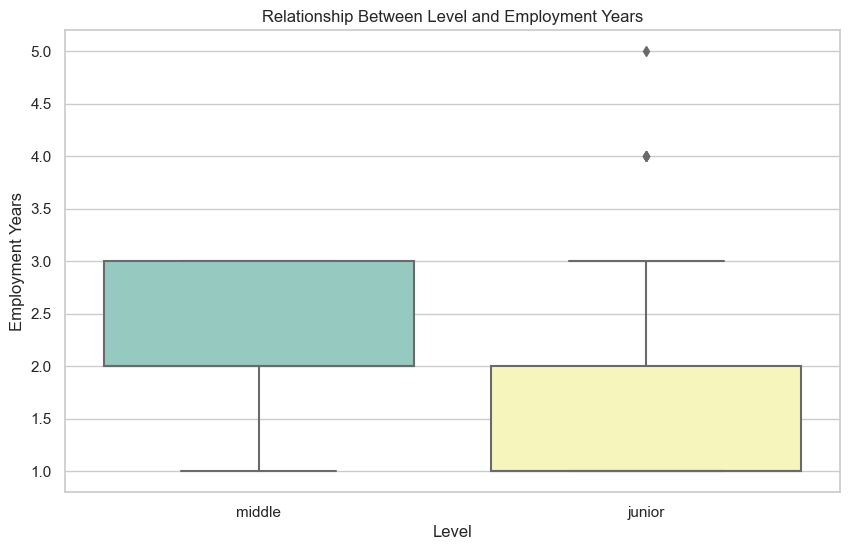

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=false_positives, x='level', y='employment_years', palette='Set3')
plt.title('Relationship Between Level and Employment Years')
plt.xlabel('Level')
plt.ylabel('Employment Years')
plt.show()

In [93]:
combined_data = pd.concat([false_positives, df_quit_no])
display(combined_data)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
16,849959,technology,middle,low,2,no,no,4,27600,0.430000,1
124,206540,sales,junior,high,2,no,no,3,33600,0.710000,1
143,343666,sales,junior,medium,3,no,no,3,26400,0.533333,1
183,222742,sales,junior,medium,1,no,no,4,21600,0.500909,1
189,788782,sales,junior,medium,2,no,no,2,24000,0.470000,1
...,...,...,...,...,...,...,...,...,...,...,...
1992,680340,sales,middle,medium,2,no,no,5,33600,0.479231,0
1993,592952,technology,middle,medium,2,no,no,5,45600,0.660000,0
1994,634763,sales,middle,low,7,no,no,4,19200,0.666667,0
1997,746018,hr,middle,medium,2,no,no,4,46800,0.636667,0


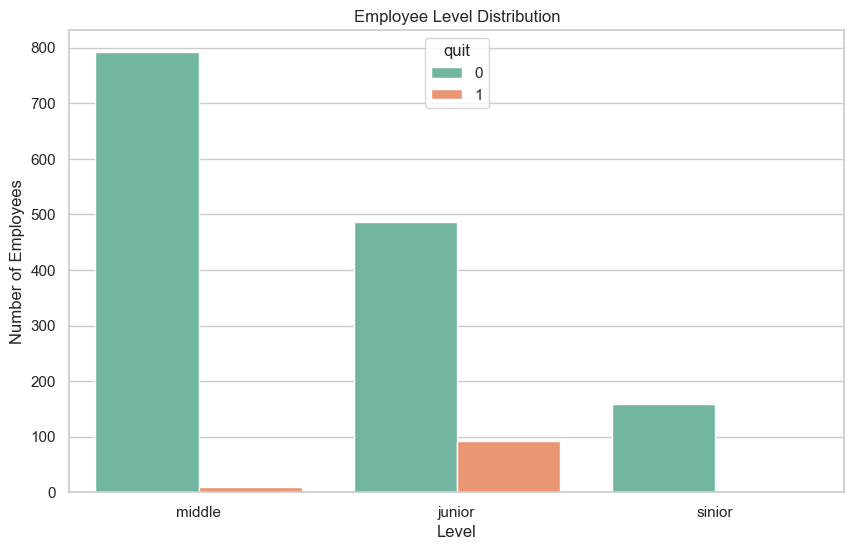

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='level', hue='quit', palette='Set2')
plt.title('Employee Level Distribution')
plt.xlabel('Level')
plt.ylabel('Number of Employees')
plt.show()

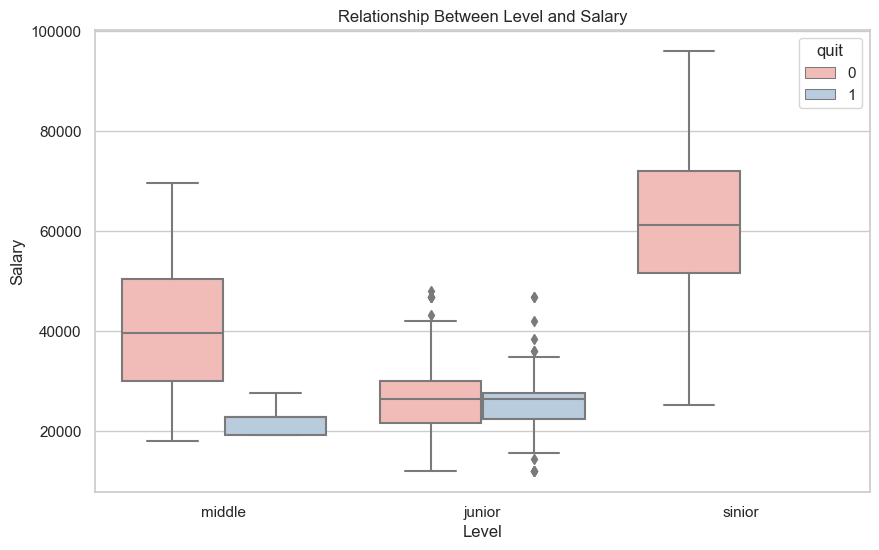

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='level', y='salary', hue='quit', palette='Pastel1')
plt.title('Relationship Between Level and Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

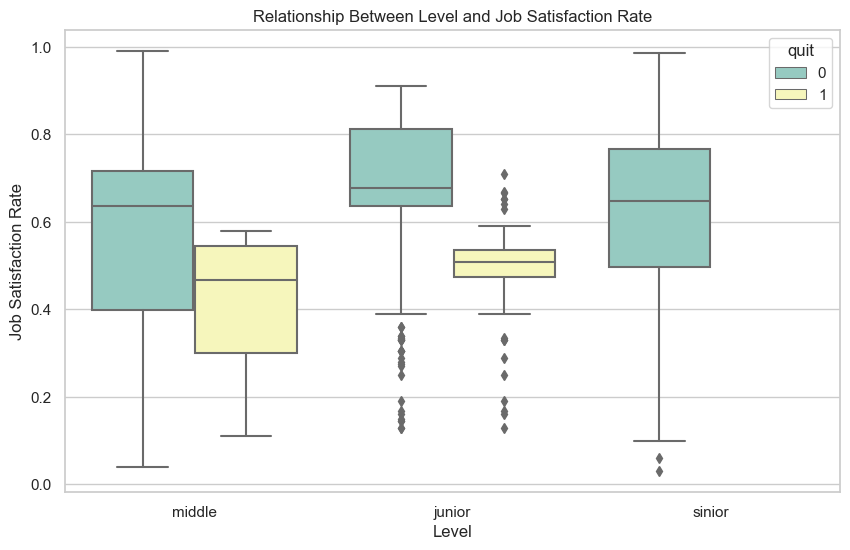

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='level', y='job_satisfaction_rate', hue='quit', palette='Set3')
plt.title('Relationship Between Level and Job Satisfaction Rate')
plt.xlabel('Level')
plt.ylabel('Job Satisfaction Rate')
plt.show()

In [97]:
false_positives_year = false_positives.query('employment_years>3')
display(false_positives_year)
display(false_positives)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
681,377243,sales,junior,low,4,no,yes,3,14400,0.19,1
989,756011,sales,junior,high,4,no,no,4,31200,0.63,1
1524,269009,purchasing,junior,low,4,no,no,1,12000,0.25,1
1541,306753,sales,junior,low,4,no,no,3,18000,0.49,1
1683,543833,marketing,junior,low,5,no,no,3,16800,0.53,1


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
16,849959,technology,middle,low,2,no,no,4,27600,0.430000,1
124,206540,sales,junior,high,2,no,no,3,33600,0.710000,1
143,343666,sales,junior,medium,3,no,no,3,26400,0.533333,1
183,222742,sales,junior,medium,1,no,no,4,21600,0.500909,1
189,788782,sales,junior,medium,2,no,no,2,24000,0.470000,1
...,...,...,...,...,...,...,...,...,...,...,...
1896,551545,purchasing,junior,medium,3,no,no,3,25200,0.503333,1
1938,980194,hr,junior,medium,1,no,no,4,22800,0.535000,1
1945,642991,sales,junior,medium,1,no,no,4,21600,0.500909,1
1948,535597,purchasing,junior,low,1,no,no,4,12000,0.510000,1


<div style="border:solid Chocolate 2px; padding: 40px">

### Key Points:

- **Employment Years**: Predictions indicate that, in the new table with predictions, people will mostly leave within their first year of work.
- **Level**: The majority of these employees will be juniors.
- **Job Satisfaction**: Their job satisfaction is moderate, ranging between 0.48 and 0.55.
- **Junior Salaries**: Junior employees' salaries range from 23,000 to 27,000 rubles, slightly lower than those who remain.
- **Mid-Level Salaries**: Mid-level employees who are likely to leave earn even less than juniors, with salaries between 19,000 and 23,000 rubles.
- **Mid-Level Job Satisfaction**: These mid-level employees are even more dissatisfied than juniors, with a job satisfaction rate between 0.3 and 0.53, which is visibly lower compared to the mid-level employees who stay.
- **Senior Employees**: No senior employees are predicted to leave.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Recommendations:
    
- Pay attention to the 101 employees I highlighted.
- Focus especially on 5 employees who have 4 to 5 years of experience but are still at the junior level.
- Review the salaries of the mid-level employees I mentioned.
- Develop long-term employment programs, such as career development and training opportunities.
- Implement retention policies for long-serving employees, such as additional bonuses for years of service.
- Introduce a mentoring program for new employees to increase engagement and job satisfaction.
- Organize regular training sessions and professional development courses so that employees can see opportunities for growth within the company.
- Ensure clear career paths and promotion opportunities for employees at all levels, especially for junior staff.
- Conduct regular appraisals and performance evaluations to identify employees ready for promotion.
- Create a development program for junior staff that includes training, mentoring, and intermediate goals.
- Increase job satisfaction by improving working conditions and the company's internal culture.
- Regularly conduct employee satisfaction surveys and respond promptly to their complaints and suggestions.
- Organize morale-boosting events, such as team-building trips, corporate events, and recognition programs for employee achievements.
- Ensure a work-life balance by offering flexible working hours and remote work options.
- Conduct a labor market analysis to compare employee salaries with market standards and identify areas needing adjustment.
- Implement a bonus and incentive system for achieving goals and high performance.
- Apply a transparent compensation policy so that employees clearly understand how their efforts and achievements impact their salary and bonuses.
</div>

In [98]:
csv_path = 'false_positives.csv'
false_positives.to_csv(csv_path, index=False)


excel_path = 'false_positives.xlsx'
false_positives.to_excel(excel_path, index=False)


display(FileLink(csv_path))
display(FileLink(excel_path))

C:\Users\User\false_positives.csv

C:\Users\User\false_positives.xlsx